# Analisi StudentAlcoholConsumption

L'obbiettivo che ci poniamo è quello di analizzare e predire il voto finale degli studenti sulla base dei dati raccolti da due scuole 
secondarie in Portogallo relative all'anno scolastico 2005-2006. L'analisi verrà svolta basandoci su alcuni aspetti sociali degli studenti come le abitubini, lo stile di vita e fattori familiari ed in
particolare facendo attanzione anche al consumo degli alcolici.
Il dataset in questione è il "Student Alcohol Consumption" ed è disponibile pubblicamente all'interno del famoso sito kaggle.com all'indirizzo: https://www.kaggle.com/uciml/student-alcohol-consumption

E' così composto:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

Il target è una misura quantitativa del voto nel primo e secondo periodo e del voto finale degli studenti indicato da questi tre campi:

1. G1 - first period grade (numeric: from 0 to 20)
2. G2 - second period grade (numeric: from 0 to 20)
3. G3 - final grade (numeric: from 0 to 20, output target)

Tuttavia assumeremo come target finale solamente G3, ovvero il voto assegnato a fine anno

Il dataset di riferimento riporta i dati di due materie di base: matematica e portoghese. Per l'EDA e la predizione dei dati ci soffermeremo esclusivamente sulla materia portoghese, in correlazione ad alcuni aspetti sociali dei ragazzi che ho suddiviso come:

1. **Fattore famiglia** ('famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'famrel', 'guardian','famsup')

2. **Fattori scolastici** ('school', 'reason', 'studytime', 'failures', 'schoolsup', 'paid', 'activities', 'nursery','higher', 'absences')

3. **Salute e informazioni personali** ('sex', 'age', 'romantic', 'freetime', 'goout', 'health')

4. **Fattore abitazione** ('address', 'traveltime', 'internet')

5. **Incidenza alcool** ('Dalc', 'Walc')

## Importo librerie e carico i dati

In [1]:
#Import librerie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import numpy as np
import scipy as sp

#config notebook
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

#Fonte
por = pd.read_csv("student-por.csv")

# Analisi dei dati

In [2]:
por.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


Visualizzo il datatype delle colonne e verifico se ci sono valori non nulli

In [3]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Panoramica distribuzione dei valori

In [4]:
por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Visualizzazione generale del nostro target voto finale "G3". Notiamo una mediana inferiore ai 12,5 e alcuni outlier in zona 0/1,5

<AxesSubplot:>

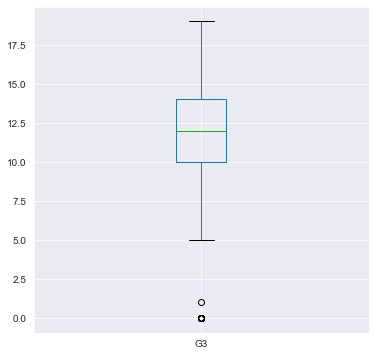

In [5]:
#boxplot del target
por.boxplot(['G3'], figsize=(6, 6))

Attraverso una heatmap vediamo la correlazione tra tutte le colonne. Notiamo come salvo G1 e G2 non ci sono forti correlazioni con il nostro target G3

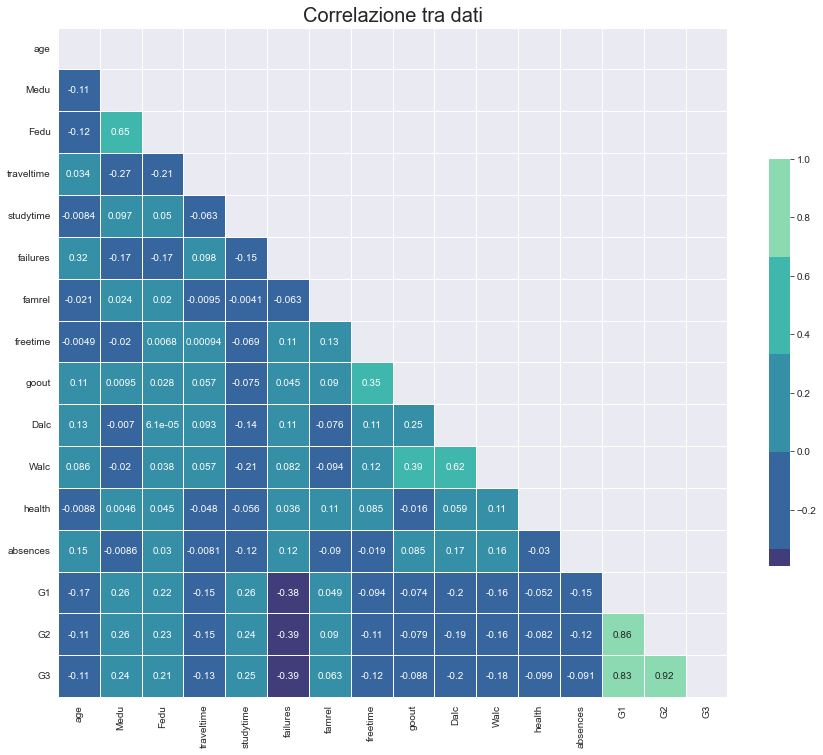

In [6]:
#Correlazione tra tutte le colonne
corr_matrix = por.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap=sns.color_palette("mako")
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0, square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlazione tra dati', size=20);

### Funzioni utili

In [7]:
def media(dataset, feature):
    
    por.name = "portoghese"
    df = dataset.groupby([feature]).G3.mean().to_frame().reset_index()

    for i in range(len(df)):
        print("La media della categoria '{}' per il corso di {} è: {:.2f}".format(df.loc[i][0], por.name, df.loc[i][1]))

In [8]:
def plot(dataset, feature, xlabel, ylabel, title):
    
    plt.figure(figsize=(16, 6))
    dfsort= dataset.sort_values(by=feature)
    sns.swarmplot(data=dfsort, x=feature, y="G3")

    sns.boxplot(data=dfsort, x=feature, y="G3",
            boxprops={'facecolor':'none'},
            showfliers=False,whiskerprops={'linewidth':0},
            showmeans=True, showcaps=False,
            meanprops={"marker":"o","markerfacecolor":"black","markersize":"10"})

    plt.xlabel(xlabel, size=14)
    plt.ylabel(ylabel, size=14)
    plt.title(title, size=18)
    plt.show()

Ho creato queste due funzioni per visualizzare agevolmente le feature che ci interessano senza dover ripetere frequentemente le stesse righe di codice. La prima funzione stampa la media per ogni categoria della colonna, mentre la seconda attraverso uno swarmplot e un boxplot ci mostra i valori.

Andiamo ora ad analizzare ogni macro settore sociale dell'alunno per rilevare i fattori che incidono più nel voto finale

## Fattore famiglia

CORRELAZIONI NUMERICHE FAMIGLIA

In [9]:
a=por[['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'famrel', 'guardian','famsup', 'G3']].head()

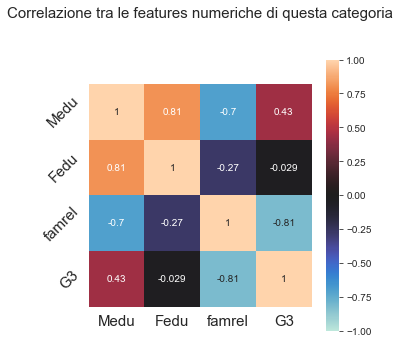

In [10]:
# Correlazione tra le features numeriche di questa sezione
corr = a.corr()
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Correlazione tra le features numeriche di questa categoria\n",pad=50, size =15)
fig = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot= True,
)

yticks = [i for i in corr.index];
xticks = [i for i in corr.columns];
plt.yticks(plt.yticks()[0], labels=yticks,fontsize=15, rotation = 45)
plt.xticks(plt.xticks()[0], labels=xticks,fontsize=15);

DIMENSIONE FAMIGLIA

La media di 'GT3' è: 11.81, quella di 'LE3' è: 12.13


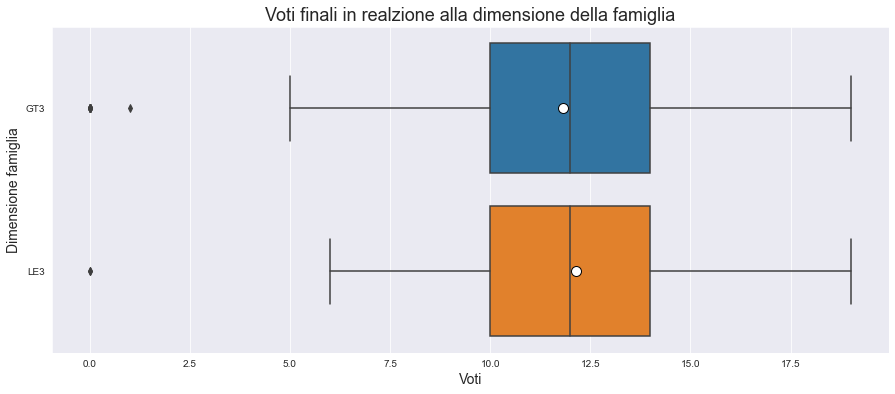

In [11]:
mean = por.loc[por["famsize"]=="GT3", 'G3'].mean()
mean2 = por.loc[por["famsize"]=="LE3", 'G3'].mean()
print("La media di 'GT3' è: {:.2f}, quella di 'LE3' è: {:.2f}".format(mean,mean2))
plt.figure(figsize=(15, 6))
sns.boxplot(data=por, x="G3", y="famsize", showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("Dimensione famiglia", size=14)
plt.xlabel("Voti", size=14)
plt.title("Voti finali in realzione alla dimensione della famiglia", size=18)
plt.show()

Si nota come una famiglia avente figlio unico ha in media un rendimento superiore che in una famiglia dove sono presenti più figli

COABITAZIONE CON GENITORI

La media di 'A' è: 11.91, quella di 'T' è: 11.91


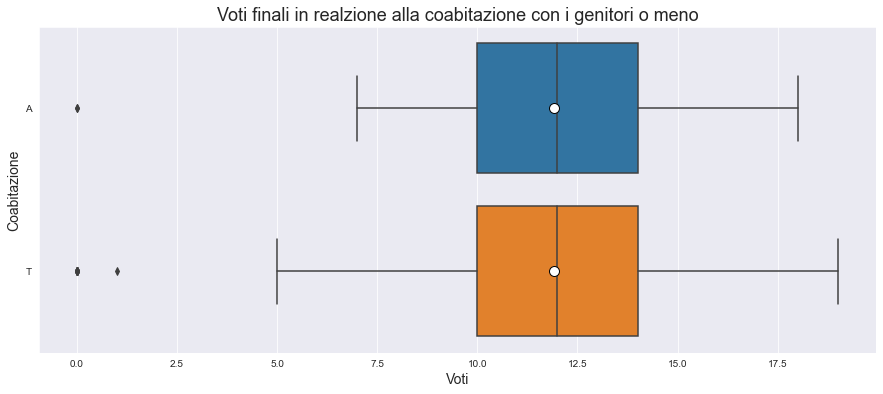

In [12]:
mean = por.loc[por["Pstatus"]=="A", 'G3'].mean()
mean2 = por.loc[por["Pstatus"]=="T", 'G3'].mean()
print("La media di 'A' è: {:.2f}, quella di 'T' è: {:.2f}".format(mean,mean2))
plt.figure(figsize=(15, 6))
sns.boxplot(data=por, x="G3", y="Pstatus", showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("Coabitazione", size=14)
plt.xlabel("Voti", size=14)
plt.title("Voti finali in realzione alla coabitazione con i genitori o meno", size=18)
plt.show()

Mentre per quanto riguarda la coabitazione con i propri genitori, vivere in autonomia oppure no, non incide secondo i nostri dati sul rendimento finale del ragazzo

EDUCAZIONE MADRE 

La media della categoria '0.0' per il corso di portoghese è: 11.67
La media della categoria '1.0' per il corso di portoghese è: 10.80
La media della categoria '2.0' per il corso di portoghese è: 11.66
La media della categoria '3.0' per il corso di portoghese è: 11.92
La media della categoria '4.0' per il corso di portoghese è: 13.07


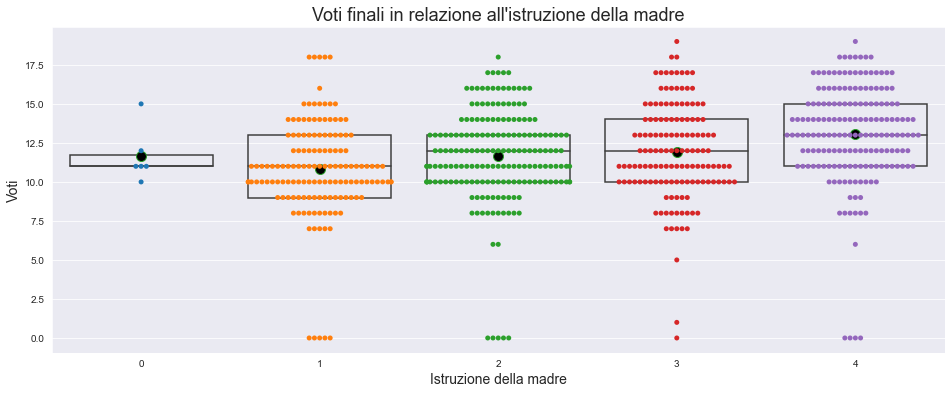

In [13]:
media(por,"Medu")
plot(por,"Medu", "Istruzione della madre", "Voti", "Voti finali in relazione all'istruzione della madre")

Particolare peso lo possiamo dare all'istruzione della madre in quanto, come facilmente visibile, una madre con una elevata istruzione incide molto nel foto finale dello studente

EDUCAZIONE PADRE

La media della categoria '0.0' per il corso di portoghese è: 12.14
La media della categoria '1.0' per il corso di portoghese è: 10.94
La media della categoria '2.0' per il corso di portoghese è: 11.78
La media della categoria '3.0' per il corso di portoghese è: 12.38
La media della categoria '4.0' per il corso di portoghese è: 12.92


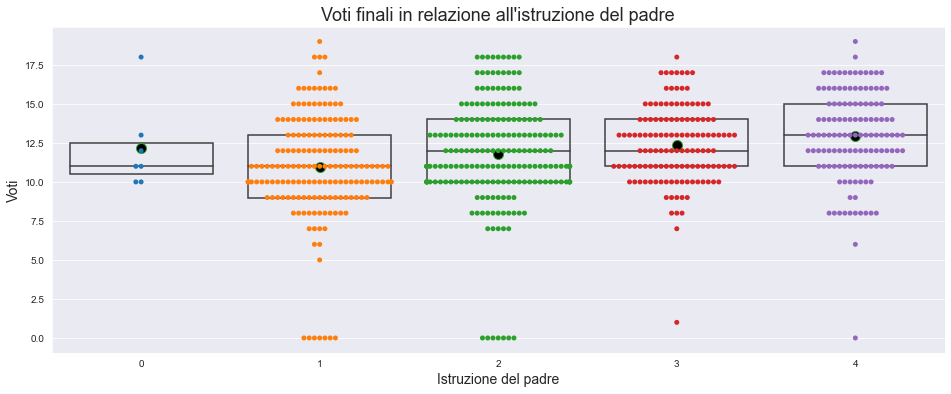

In [14]:
media(por,"Fedu")
plot(por,"Fedu", "Istruzione del padre", "Voti", "Voti finali in relazione all'istruzione del padre")

Possiamo dire la stessa cosa del padre, anch'esso ha un peso importante nel voto finale

LAVORO MADRE

La media della categoria 'at_home' per il corso di portoghese è: 11.04
La media della categoria 'health' per il corso di portoghese è: 13.06
La media della categoria 'other' per il corso di portoghese è: 11.67
La media della categoria 'services' per il corso di portoghese è: 12.15
La media della categoria 'teacher' per il corso di portoghese è: 13.14


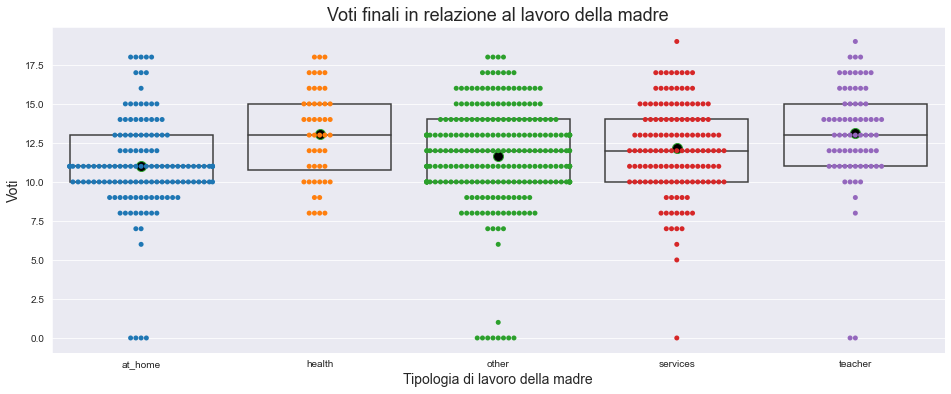

In [15]:
media(por,"Mjob")
plot(por,"Mjob", "Tipologia di lavoro della madre", "Voti", "Voti finali in relazione al lavoro della madre")

In questo grafico possiamo trarre delle considerazioni interessanti in quanto gli studenti aventi la madre insegnante risultano avere una media voto superiore ad altri settori lavorativi. Inoltre particolare influenza la hanno pure i genitori che prestano un lavoro di servizio sanitario. Interessante anche notare come gli studenti aventi madri disoccupate abbiano una media voto più bassa rispetto a tutte le altre categorie analizzate

LAVORO PADRE

La media della categoria 'at_home' per il corso di portoghese è: 11.43
La media della categoria 'health' per il corso di portoghese è: 12.57
La media della categoria 'other' per il corso di portoghese è: 11.89
La media della categoria 'services' per il corso di portoghese è: 11.63
La media della categoria 'teacher' per il corso di portoghese è: 13.58


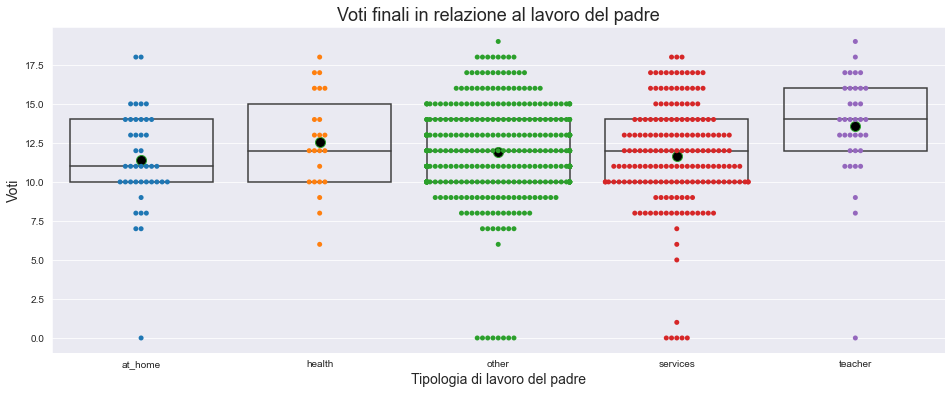

In [16]:
media(por,"Fjob")
plot(por,"Fjob", "Tipologia di lavoro del padre", "Voti", "Voti finali in relazione al lavoro del padre")

Per il padre si presenta una situazione analoga

SUPPORTO EDUCAZIONALE DALLA FAMIGLIA

La media della categoria 'no' per il corso di portoghese è: 11.67
La media della categoria 'yes' per il corso di portoghese è: 12.06


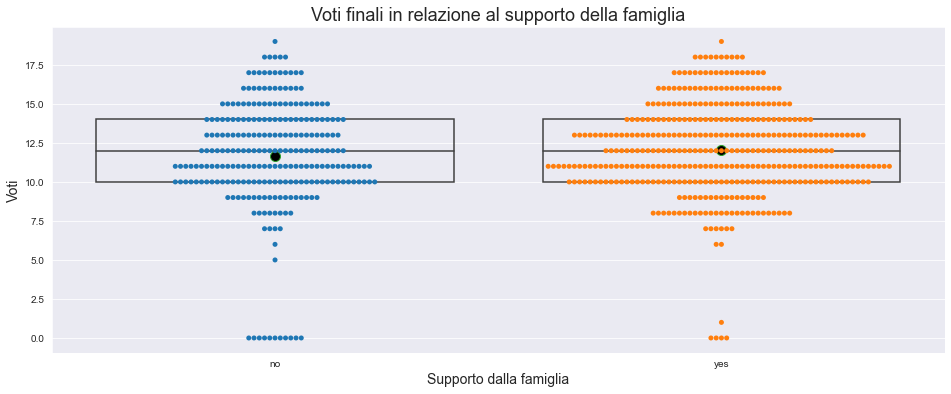

In [17]:
media(por,"famsup")
plot(por,"famsup", "Supporto dalla famiglia", "Voti", "Voti finali in relazione al supporto della famiglia")

Per quanto riguarda il supporto offerto dalla famiglia notiamo come gli studenti seguiti hanno una media voto più alta

TUTORE

La media della categoria 'father' per il corso di portoghese è: 12.20
La media della categoria 'mother' per il corso di portoghese è: 11.90
La media della categoria 'other' per il corso di portoghese è: 10.90


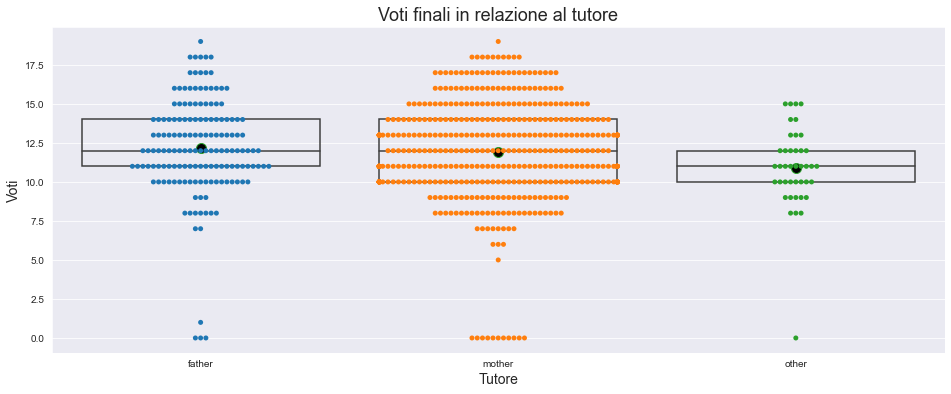

In [18]:
media(por,"guardian")
plot(por,"guardian", "Tutore", "Voti", "Voti finali in relazione al tutore")

Inoltre se a seguire l'alunno è il padre, come notiamo in questo grafico, il rendimento è maggiore. Interessante notare come l'apporto di un supporto esterno alla famiglia produca un risultato negativo allo studente

QUALITA' RELAZIONI CON LA FAMIGLIA

La media della categoria '1.0' per il corso di portoghese è: 10.64
La media della categoria '2.0' per il corso di portoghese è: 10.86
La media della categoria '3.0' per il corso di portoghese è: 11.59
La media della categoria '4.0' per il corso di portoghese è: 12.34
La media della categoria '5.0' per il corso di portoghese è: 11.63


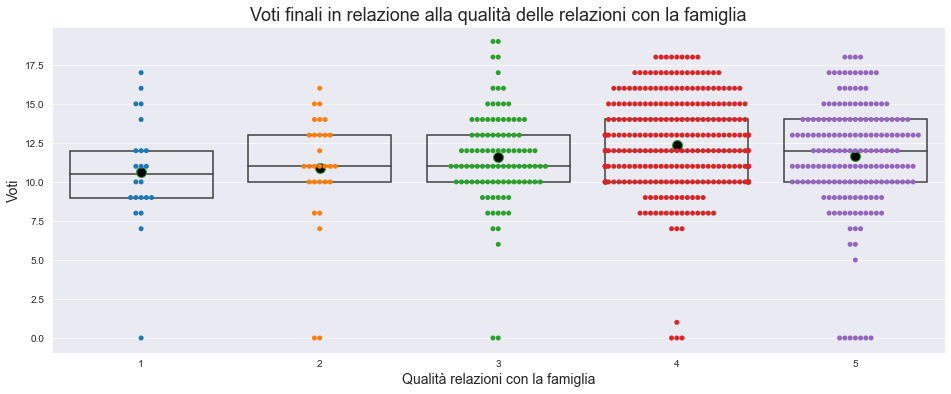

In [19]:
media(por,"famrel")
plot(por,"famrel", "Qualità relazioni con la famiglia", "Voti", "Voti finali in relazione alla qualità delle relazioni con la famiglia")

In questo grafico invece possiamo notare come la qualità dei rapporti con i genitori incida molto sul rendimento dei ragazzi, infatti avere un bel rapporto porta ad avere una media più alta. Tuttavia in una scala da 1 a 5, il miglior rendimento si può riscontrare in quei casi in cui il grado di intesa raggiunge il valore "4", mentre il massimo valore "5", risulta leggermente penalizzante, ma comunque migliore di "3"

## Fattori scolastici

CORRELAZIONI NUMERICHE SCUOLA

In [20]:
a=por[['school', 'reason', 'studytime', 'failures', 'schoolsup', 'paid', 'activities', 'nursery','higher', 'absences', 'G3']].head()

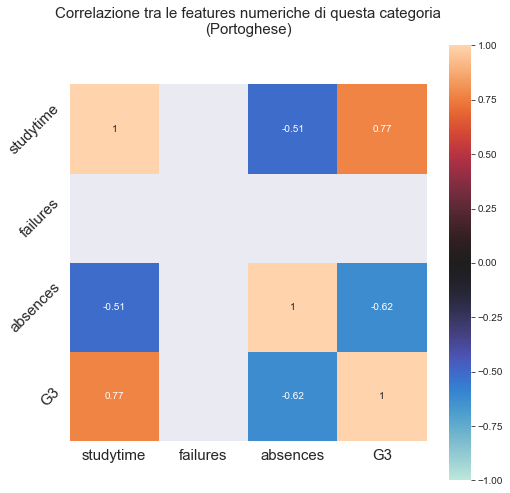

In [21]:
# Correlazione tra le features numeriche di questa sezione
corr = a.corr()
fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Correlazione tra le features numeriche di questa categoria\n(Portoghese)",pad=50, size =15)
fig = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot= True,
)

yticks = [i for i in corr.index];
xticks = [i for i in corr.columns];
plt.yticks(plt.yticks()[0], labels=yticks,fontsize=15, rotation = 45)
plt.xticks(plt.xticks()[0], labels=xticks,fontsize=15);

SCUOLA FREQUENTATA


La media della categoria 'GP' per il corso di portoghese è: 12.58
La media della categoria 'MS' per il corso di portoghese è: 10.65


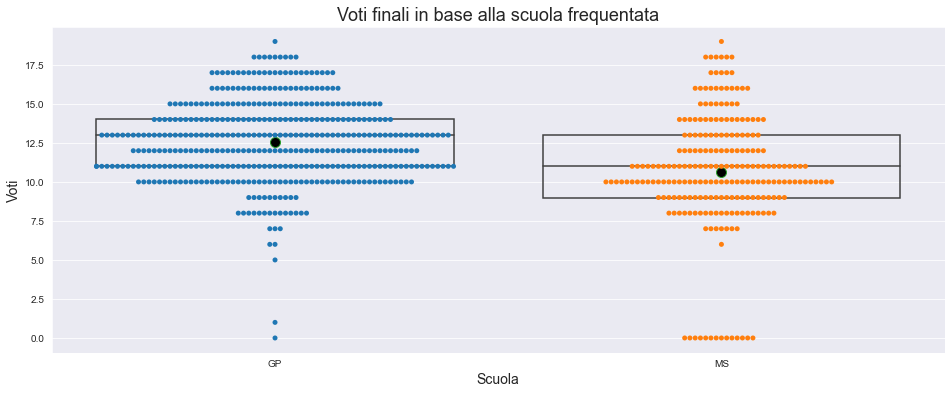

In [22]:
media(por,"school")
plot(por,"school", "Scuola", "Voti", "Voti finali in base alla scuola frequentata")

Il nostro dataset prende in esame i dati prodotti da due scuole, notiamo che mettendole a confronto gli alunni che frequentano la scuola "Gabriel Pereira" risultano avere una media voto superiore, a discapito dell'istituto "Mousinho da Silveira"

RAGIONE SCELTA SCUOLA

La media della categoria 'course' per il corso di portoghese è: 11.55
La media della categoria 'home' per il corso di portoghese è: 12.18
La media della categoria 'other' per il corso di portoghese è: 10.69
La media della categoria 'reputation' per il corso di portoghese è: 12.94


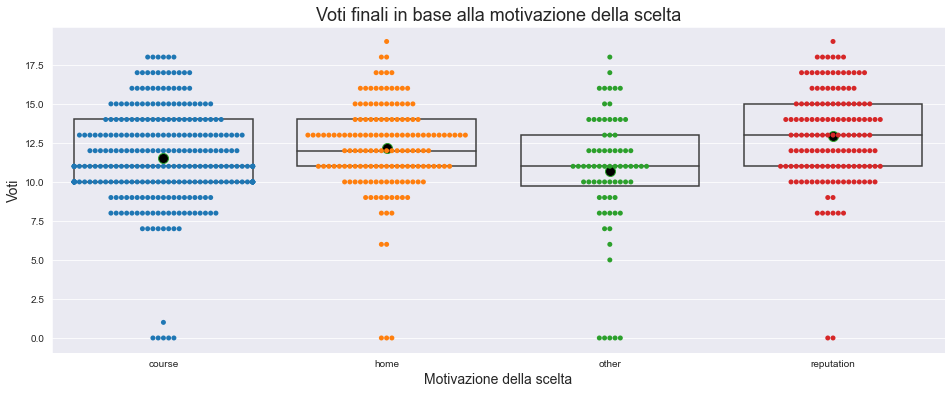

In [23]:
media(por,"reason")
plot(por,"reason", "Motivazione della scelta", "Voti", "Voti finali in base alla motivazione della scelta")

Il grafico in questione invece ci rileva quale motivazione della scelta di aver intrpreapreso la scuola di riferimento ha inciso particolarmente sul voto finale. Notiamo come una scelta basata sulla reputazione sia quella che risulta avere una media voto supreriore a tutte le altre

TEMPO DI STUDIO SETTIMANALE

La media della categoria '1.0' per il corso di portoghese è: 10.84
La media della categoria '2.0' per il corso di portoghese è: 12.09
La media della categoria '3.0' per il corso di portoghese è: 13.23
La media della categoria '4.0' per il corso di portoghese è: 13.06


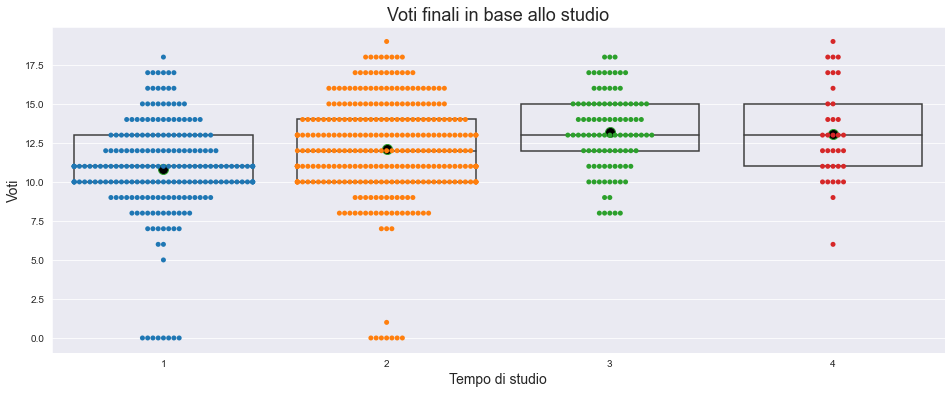

In [24]:
media(por,"studytime")
plot(por,"studytime", "Tempo di studio", "Voti", "Voti finali in base allo studio")

In una scala che va da "1" a "4" che indica il grado di tempo di studio possiamo, senza particolare sorpresa, vedere come un grado maggiore di tempo di studio porti a dei risultati migliori, tuttavia è interessante notare come un elevato studio penalizza gli studenti, infatti il valore "3"  riporta il miglior risultato

NUMERO BOCCIATURE

La media della categoria '0.0' per il corso di portoghese è: 12.51
La media della categoria '1.0' per il corso di portoghese è: 8.64
La media della categoria '2.0' per il corso di portoghese è: 8.81
La media della categoria '3.0' per il corso di portoghese è: 8.07


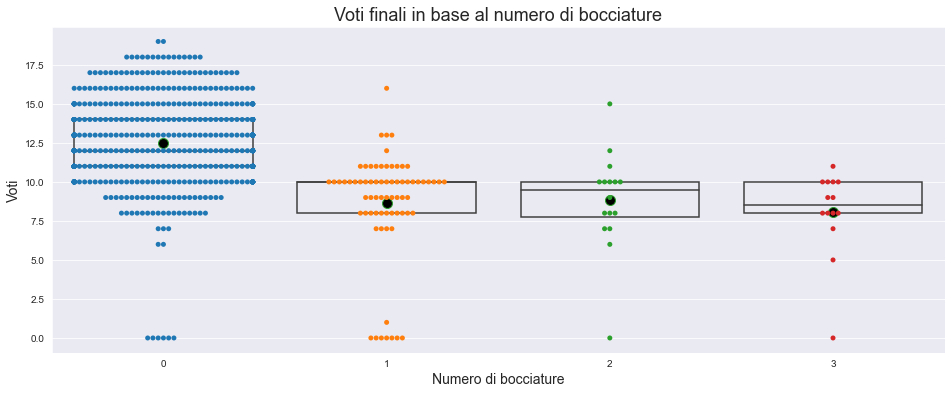

In [25]:
media(por,"failures")
plot(por,"failures", "Numero di bocciature", "Voti", "Voti finali in base al numero di bocciature")

Analizzando il numero di bocciature, anche in questo caso abbiamo un risultato abbastanza prevedibile, infatti gli alunni che non sono mai stati bocciati risultano avere una media dei voti finale superiore. A discapito di quelli che lo sono stati e gradualmente man mano che si aumenta il numero di volte la media generale scende

SUPPORTO EDUCAZIONALE EXTRA

La media della categoria 'no' per il corso di portoghese è: 11.98
La media della categoria 'yes' per il corso di portoghese è: 11.28


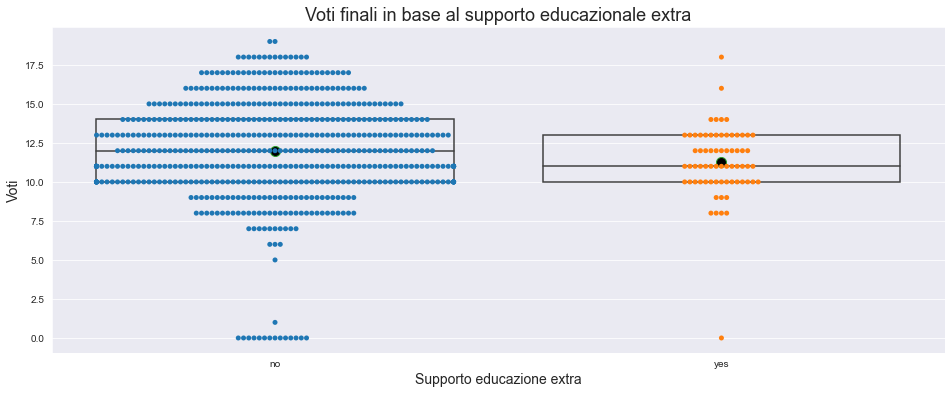

In [26]:
media(por,"schoolsup")
plot(por,"schoolsup", "Supporto educazione extra", "Voti", "Voti finali in base al supporto educazionale extra")

In questa analisi notiamo come un supporto educazionale extra non ha apportato benifici in termini di media dei voti finali, in quanto gli studenti che non hanno adottato questa metodologia risultato avere una media voto superiore

CORSI AGGIUNTIVI A PAGAMENTO PER LA MATERIA IN QUESTIONE

La media della categoria 'no' per il corso di portoghese è: 11.95
La media della categoria 'yes' per il corso di portoghese è: 11.21


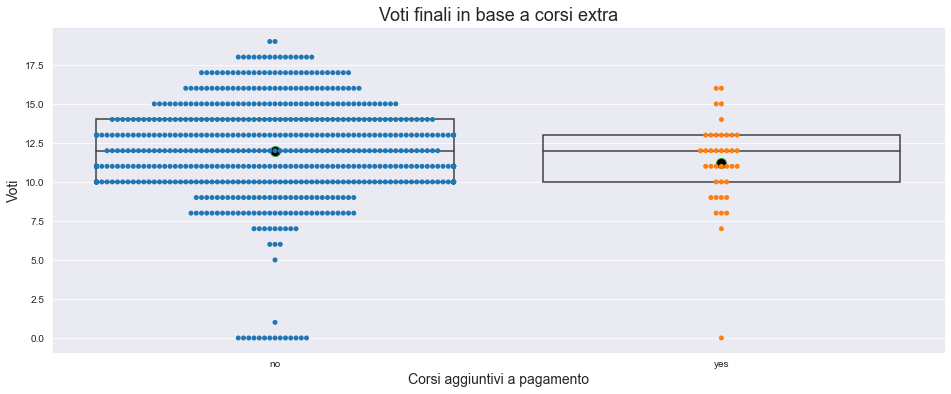

In [27]:
media(por,"paid")
plot(por,"paid", "Corsi aggiuntivi a pagamento", "Voti", "Voti finali in base a corsi extra")

Situazione analoga la troviamo per gli studenti che hanno adottato uno studio extra a pagamento. Questa metodologia secondo i nostri dati non ha contribuito mediamente ad un innalzamento del rendimento

ATTIVITA' EXTRA CURRICOLARI

La media della categoria 'no' per il corso di portoghese è: 11.72
La media della categoria 'yes' per il corso di portoghese è: 12.10


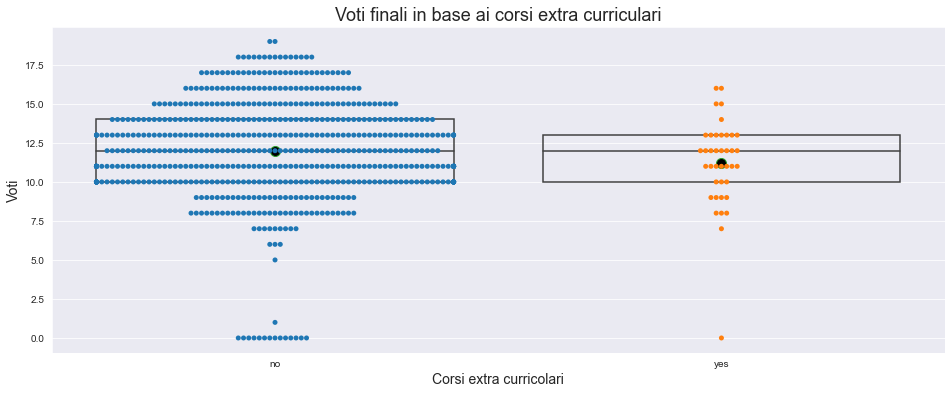

In [28]:
media(por,"activities")
plot(por,"paid", "Corsi extra curricolari", "Voti", "Voti finali in base ai corsi extra curriculari")

Stessa situazione ritroviamo in questo

FREQUENTATO ASILO

La media della categoria 'no' per il corso di portoghese è: 11.72
La media della categoria 'yes' per il corso di portoghese è: 11.95


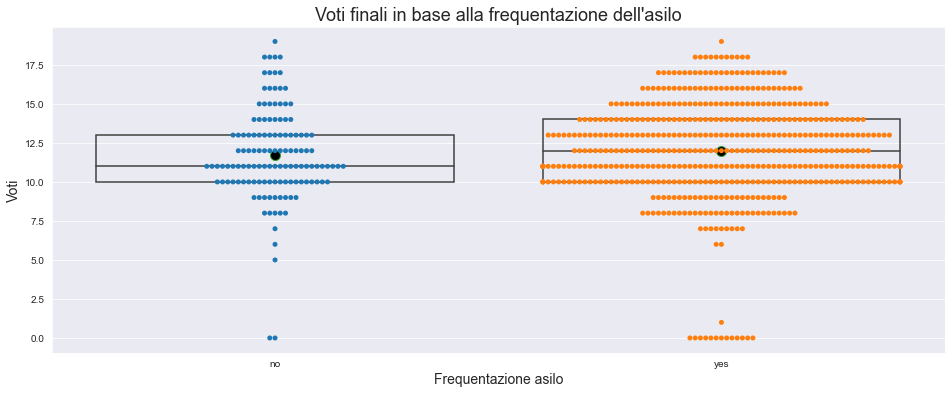

In [29]:
media(por,"nursery")
plot(por,"nursery", "Frequentazione asilo", "Voti", "Voti finali in base alla frequentazione dell'asilo")

In base ai dati in nostro possesso attraverso questa visualizzazione possiamo notare come l'aver frequentato l'asilo ha inciso mediamente nel voto finale dei ragazzi

INTENZIONE DI PROSEGUIRE GLI STUDI

La media della categoria 'no' per il corso di portoghese è: 8.80
La media della categoria 'yes' per il corso di portoghese è: 12.28


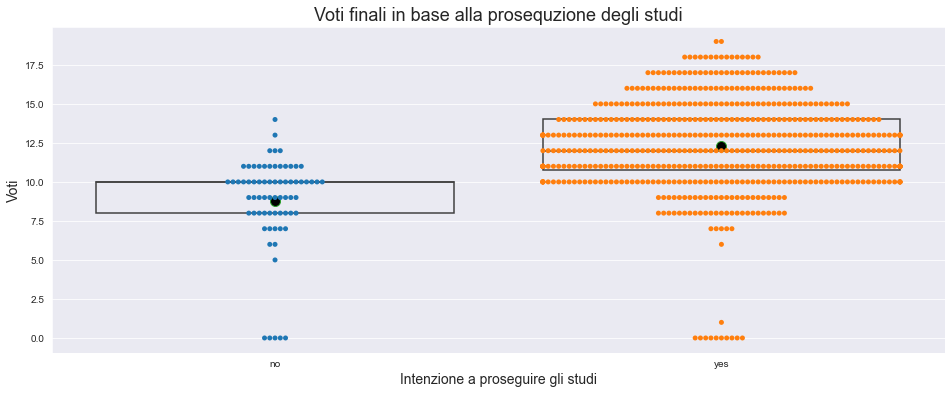

In [30]:
media(por,"higher")
plot(por,"higher", "Intenzione a proseguire gli studi", "Voti", "Voti finali in base alla prosequzione degli studi")

L'intenzione di prosequire gli studi, come evidenziato in questo grafico, incide notevolmente sul voto finale degli alunni, infatti la media si discosta di molto

NUMERO DI ASSENZE

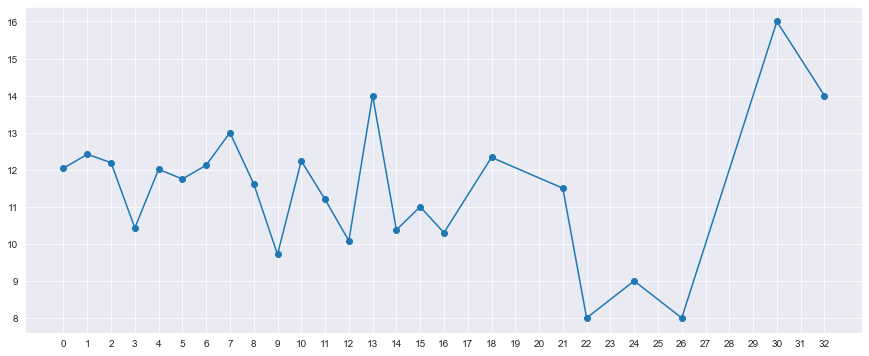

In [31]:
df= por.groupby(["absences"]).G3.mean().reset_index()

fig = plt.figure(figsize=(15,6))

plt.plot('absences', 'G3', data=df, linestyle='-', marker='o')
plt.xticks(np.arange(min(df.absences), max(df.absences)+1))
plt.show()

Text(0.5, 1.0, 'Rapporto assenze e voto finale')

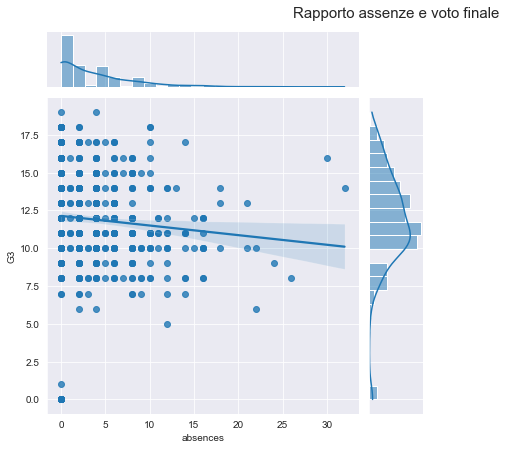

In [32]:
sns.jointplot( x='absences',y='G3', data=por , kind='reg')
plt.title('Rapporto assenze e voto finale',pad=80, size=15)

Attraverso queste due visuali possiamo evidenziare che il numero di assenze incide nel voto medio finale degli studenti, infatti gli alunni che hanno un basso numero di assenze generalmente risultano avere una media superiore rispetto a quelli che saltano più frequentemente la scuola

## Salute e informazioni personali

CORRELAZIONI NUMERICHE SALUTE E INFORMAZIONI PERSONALI

In [33]:
a=por[['sex', 'age', 'romantic', 'freetime', 'goout', 'health', 'G3']].head()

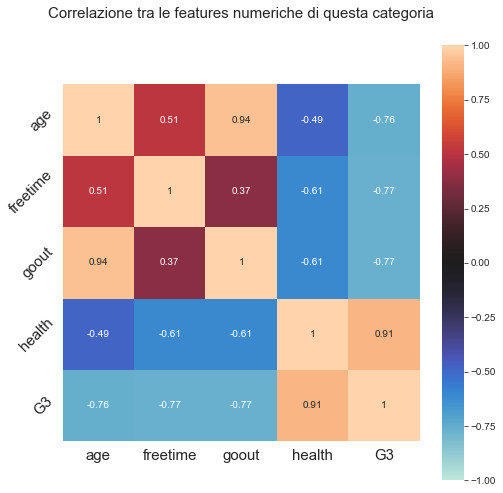

In [34]:
# Correlazione tra le features numeriche di questa sezione
corr = a.corr()
fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Correlazione tra le features numeriche di questa categoria\n",pad=50, size =15)
fig = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot= True,
)

yticks = [i for i in corr.index];
xticks = [i for i in corr.columns];
plt.yticks(plt.yticks()[0], labels=yticks,fontsize=15, rotation = 45)
plt.xticks(plt.xticks()[0], labels=xticks,fontsize=15);

SESSO STUDENTI

La media della categoria 'F' per il corso di portoghese è: 12.25
La media della categoria 'M' per il corso di portoghese è: 11.41


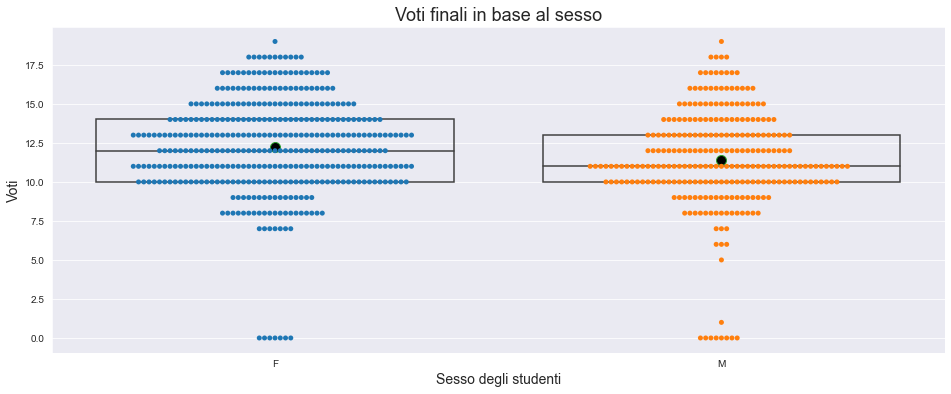

In [35]:
media(por,"sex")
plot(por,"sex", "Sesso degli studenti", "Voti", "Voti finali in base al sesso")

Per quanto riguarda il genere degli studenti ci risulta che le donne hanno un rendimento leggermente superiore rispetto agli uomini

ETA' STUDENTI

La media della categoria '15.0' per il corso di portoghese è: 12.11
La media della categoria '16.0' per il corso di portoghese è: 11.99
La media della categoria '17.0' per il corso di portoghese è: 12.27
La media della categoria '18.0' per il corso di portoghese è: 11.77
La media della categoria '19.0' per il corso di portoghese è: 9.53
La media della categoria '20.0' per il corso di portoghese è: 12.00
La media della categoria '21.0' per il corso di portoghese è: 11.00
La media della categoria '22.0' per il corso di portoghese è: 5.00


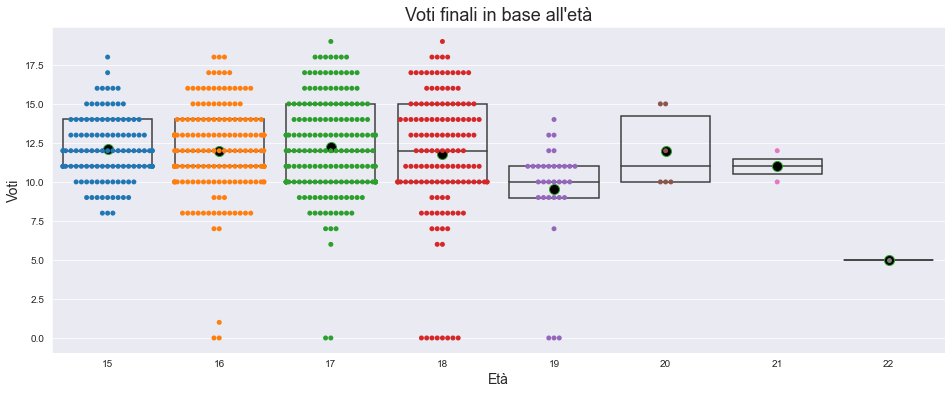

In [36]:
media(por,"age")
plot(por,"age", "Età", "Voti", "Voti finali in base all'età")

Inoltre per quanto riguarda l'età dalla nostra analisi dei dati rileviamo come a 17 anni i ragazzi hanno il loro rendimento megliore ed in generale dai anni 15 ai 18 si ha un rendimento costante intorno al voto 11-12, mentre avanzando con l'età, probabilemente dovuto anche alle bocciature la media scende

FIDANZATI

La media della categoria 'no' per il corso di portoghese è: 12.13
La media della categoria 'yes' per il corso di portoghese è: 11.52


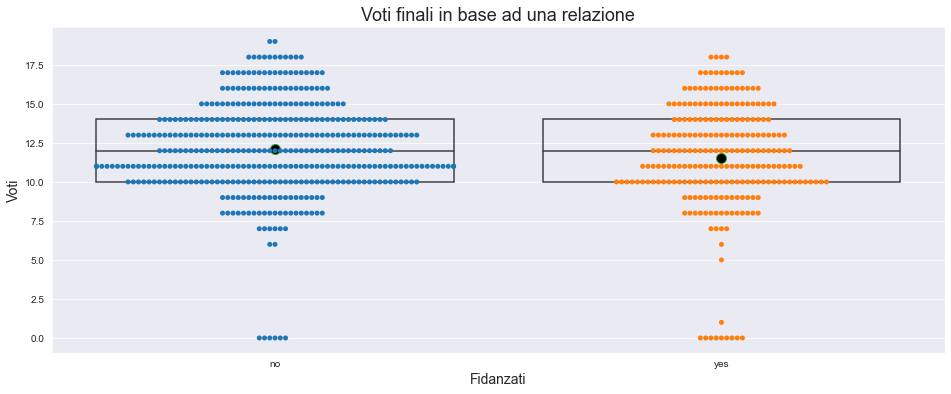

In [37]:
media(por,"romantic")
plot(por,"romantic", "Fidanzati", "Voti", "Voti finali in base ad una relazione")

I ragazzi che durante il periodo scolastico sono fidanzati ci risulta avere un rendimento leggermente inferiore

TEMPO LIBERO

La media della categoria '1.0' per il corso di portoghese è: 11.73
La media della categoria '2.0' per il corso di portoghese è: 12.71
La media della categoria '3.0' per il corso di portoghese è: 12.06
La media della categoria '4.0' per il corso di portoghese è: 11.71
La media della categoria '5.0' per il corso di portoghese è: 10.69


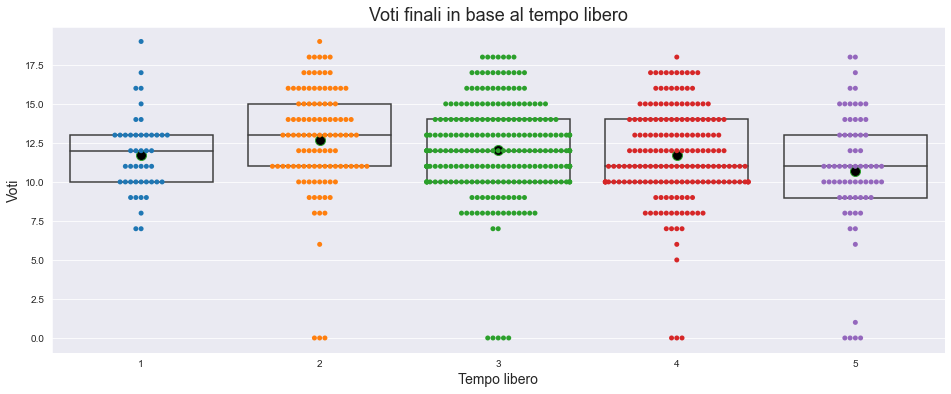

In [38]:
media(por,"freetime")
plot(por,"freetime", "Tempo libero", "Voti", "Voti finali in base al tempo libero")

L'analisi in questione risulta interessante in quanto possiamo evidenziare che i ragazzi che hanno molto tempo libero tendono ad avere una media del voto finale inferiore rispetto ai ragazzi più impegnati in attività extra scolastiche. In particolare il miglior rendimento si ha negli studenti che hanno un grado di tempo libero pari a "2"

USCITE CON GLI AMICI

La media della categoria '1.0' per il corso di portoghese è: 10.73
La media della categoria '2.0' per il corso di portoghese è: 12.67
La media della categoria '3.0' per il corso di portoghese è: 12.15
La media della categoria '4.0' per il corso di portoghese è: 11.97
La media della categoria '5.0' per il corso di portoghese è: 10.87


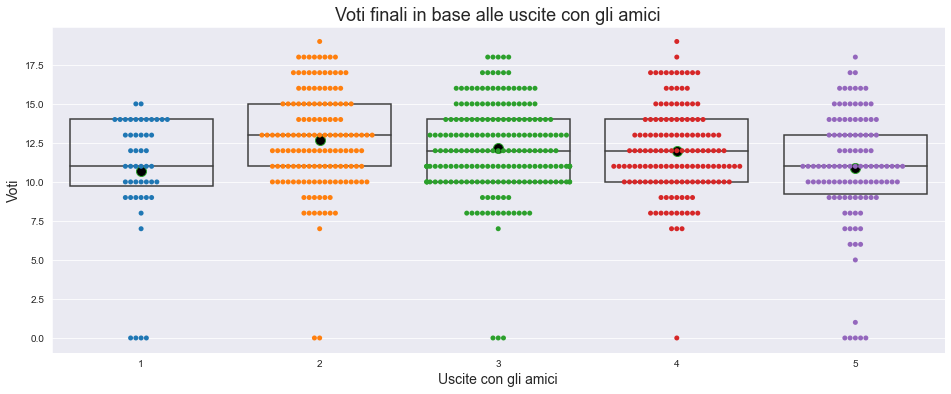

In [39]:
media(por,"goout")
plot(por,"goout", "Uscite con gli amici", "Voti", "Voti finali in base alle uscite con gli amici")

Anche per quanto riguarda le "uscite con gli amici" il miglior rendimento si ha con un valore pari a "2", pertanto i ragazzi che escono non molto frequentemente risultano essere i migliori a scuola. Non vale la stessa cosa per quelli che non escono mai e per quelli che escono troppo

STATO DI SALUTE

La media della categoria '1.0' per il corso di portoghese è: 12.48
La media della categoria '2.0' per il corso di portoghese è: 12.19
La media della categoria '3.0' per il corso di portoghese è: 11.84
La media della categoria '4.0' per il corso di portoghese è: 12.31
La media della categoria '5.0' per il corso di portoghese è: 11.47


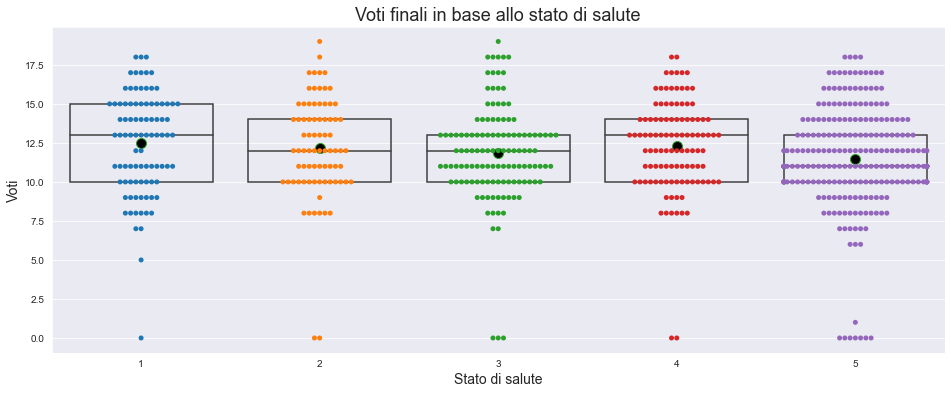

In [40]:
media(por,"health")
plot(por,"health", "Stato di salute", "Voti", "Voti finali in base allo stato di salute")

Anche la salute come rilevato da questo grafico incide sulle performance rendimentali del ragazzo. Un ragazzo in piena salute risulta avere una media superiore a quelli che presentano problemi di salute

## Fattore abitazione

CORRELAZIONI NUMERICHE FATTORE ABITAZIONE

In [41]:
a=por[['address', 'traveltime', 'internet', 'G3']].head()

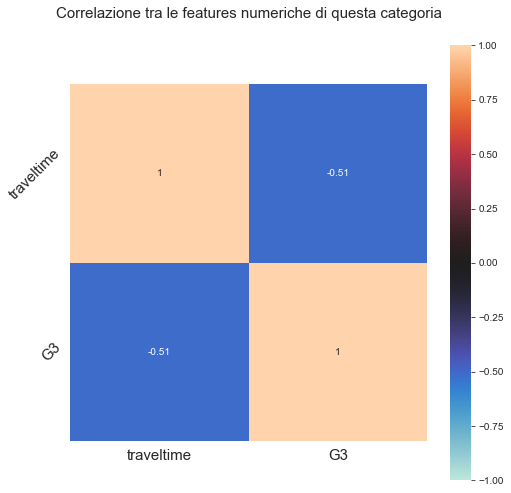

In [42]:
# Correlazione tra le features numeriche di questa sezione
corr = a.corr()
fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Correlazione tra le features numeriche di questa categoria\n",pad=50, size =15)
fig = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot= True,
)

yticks = [i for i in corr.index];
xticks = [i for i in corr.columns];
plt.yticks(plt.yticks()[0], labels=yticks,fontsize=15, rotation = 45)
plt.xticks(plt.xticks()[0], labels=xticks,fontsize=15);

TIPO DI ABITAZIONE

La media della categoria 'R' per il corso di portoghese è: 11.09
La media della categoria 'U' per il corso di portoghese è: 12.26


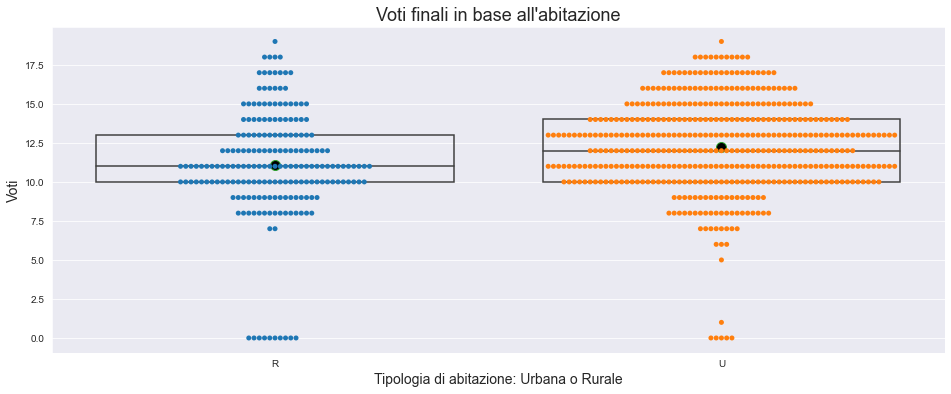

In [43]:
media(por,"address")
plot(por,"address", "Tipologia di abitazione: Urbana o Rurale", "Voti", "Voti finali in base all'abitazione")

In base al tipo di abitazione dai nostri dati è emerso che i ragazzi che hanno un'abitazione in una zona urbana risultano essere migliori, rispetto a quelli che provengono da una abitazione rurale

TEMPO PERCORRENZA CASA-SCUOLA

La media della categoria '1.0' per il corso di portoghese è: 12.25
La media della categoria '2.0' per il corso di portoghese è: 11.58
La media della categoria '3.0' per il corso di portoghese è: 11.17
La media della categoria '4.0' per il corso di portoghese è: 10.88


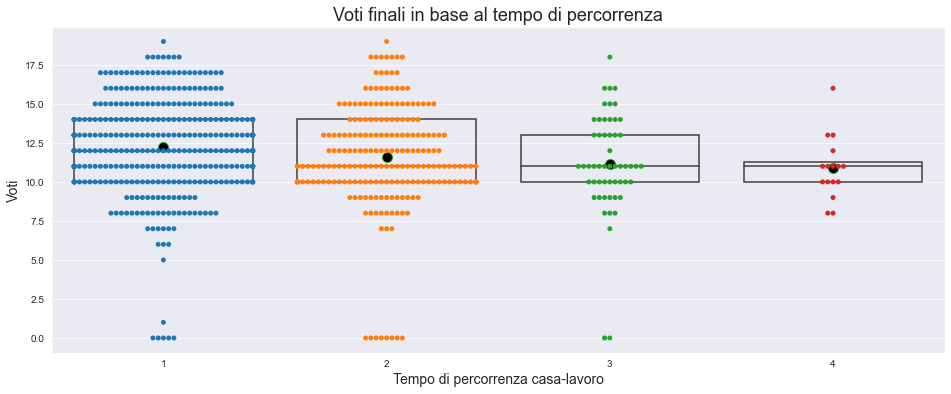

In [44]:
media(por,"traveltime")
plot(por,"traveltime", "Tempo di percorrenza casa-lavoro", "Voti", "Voti finali in base al tempo di percorrenza")

Notiamo in maniera chiara come il tempo di percorrenza incida significativamente sul rendimento degli studenti. Dal grafico infatti notiamo come i ragazzi che impiegano poco tempo risultano essere migliori, a discapito di quelli che devono percorrere grandi tragitti per arrivare a scuola

PRESENZA CONNESIONE AD INTERNET

La media della categoria 'no' per il corso di portoghese è: 11.03
La media della categoria 'yes' per il corso di portoghese è: 12.17


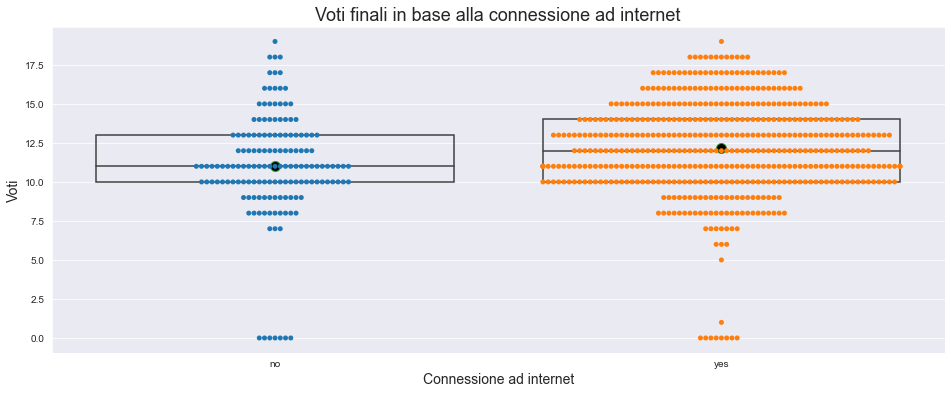

In [45]:
media(por,"internet")
plot(por,"internet", "Connessione ad internet", "Voti", "Voti finali in base alla connessione ad internet")

Inoltre si può evidenziare come una connessione ad internet sia indice di rendimento maggiore, a differenza di quelli sprovvisti

## Incidenza alcool

CORRELAZIONI NUMERICHE INCIDENZA ALCOOOL

In [46]:
a=por[['Dalc', 'Walc', 'G3']].head()

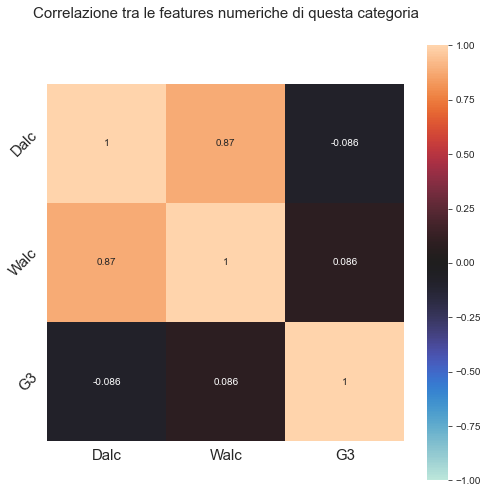

In [47]:
# Correlazione tra le features numeriche di questa sezione
corr = a.corr()
fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Correlazione tra le features numeriche di questa categoria\n",pad=50, size =15)
fig = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot= True,
)

yticks = [i for i in corr.index];
xticks = [i for i in corr.columns];
plt.yticks(plt.yticks()[0], labels=yticks,fontsize=15, rotation = 45)
plt.xticks(plt.xticks()[0], labels=xticks,fontsize=15);

CONSUMO GIORNALIERO DI ALCOOL

La media della categoria '1.0' per il corso di portoghese è: 12.30
La media della categoria '2.0' per il corso di portoghese è: 11.36
La media della categoria '3.0' per il corso di portoghese è: 11.14
La media della categoria '4.0' per il corso di portoghese è: 8.94
La media della categoria '5.0' per il corso di portoghese è: 10.24


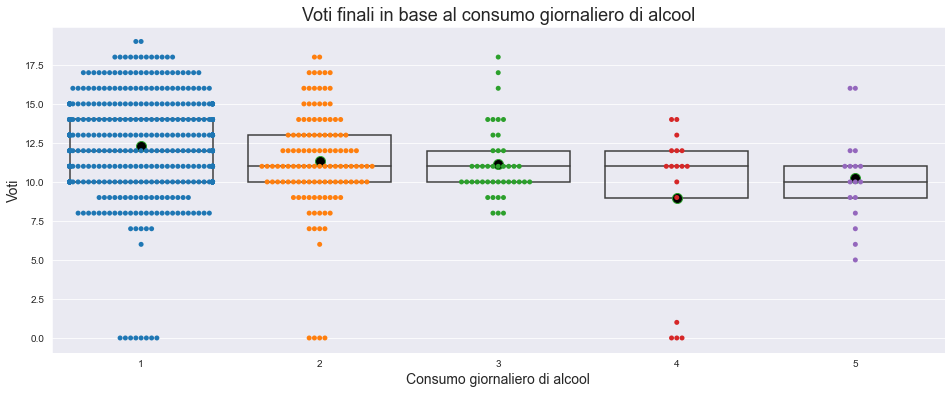

In [48]:
media(por,"Dalc")
plot(por,"Dalc", "Consumo giornaliero di alcool", "Voti", "Voti finali in base al consumo giornaliero di alcool")

Aspetto molto importante da valutare è l'incidenza dell'alcool nel rendimento dei ragazzi. In base al grafico prodotto ci risulta che i ragazzi che fammo meno uso di questa sostanza hanno un rendimento significamente superiore rispetto a quelli che lo fanno regolarmente

CONSUMO DI ALCOOL NEL WEEKEND

La media della categoria '1.0' per il corso di portoghese è: 12.36
La media della categoria '2.0' per il corso di portoghese è: 12.26
La media della categoria '3.0' per il corso di portoghese è: 11.67
La media della categoria '4.0' per il corso di portoghese è: 11.03
La media della categoria '5.0' per il corso di portoghese è: 10.56


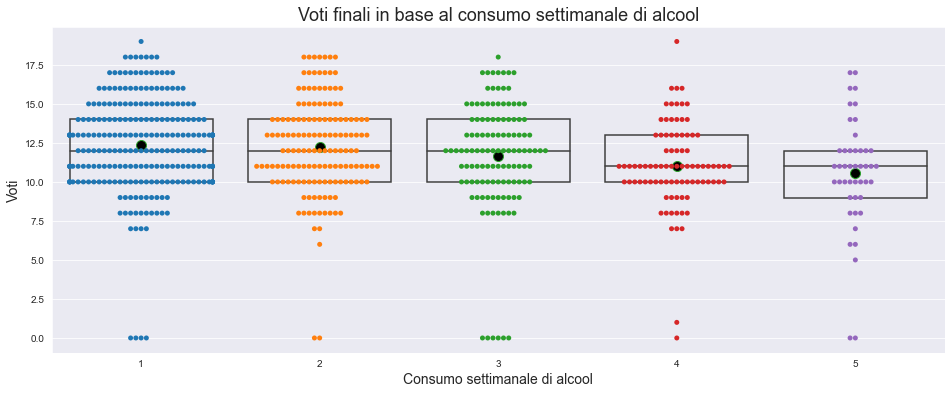

In [49]:
media(por,"Walc")
plot(por,"Walc", "Consumo settimanale di alcool", "Voti", "Voti finali in base al consumo settimanale di alcool")

Stessa cosa possiamo dire per il consumo settimanale di questa sostanza. Meno è l'alcool assunto settimanalmente, più la media finale dei voti è alta

## Considerazioni analisi EDA

Avendo esaminato ogni feature suddivisa in macro settori si può affermare che:

Dal punto di vista delle **fattori familiari** risulta che gli elementi che hanno un'influenza positiva sul voto finale del ragazzo sono:
- vivere in una famiglia **ristretta**
- avere un'istruzione della madre **elevata**
- avere un'istruzione del padre **elevata**
- appartenere in una famiglia dove la madre svolge un lavoro come **insegnante** oppure nel **settore sanitario**
- appartenere in una famiglia dove il padre svolge un lavoro come **insegnante** oppure nel **settore sanitario**
- essere **supportati** dalla famiglia
- avere come tutore il proprio **padre**
- avere una **buona relazione** con i genitori

Dal punto di vista dei **fattori scolatici** risulta che gli elementi che hanno un'influenza positiva sul voto finale del ragazzo sono:
- appartenenza all'istituto **"Gabriel Pereira"**
- il movente della scelta della scuola da frequentare è stata dettata dalla **"reputazione"**
- tempo di studio **elevato**, ma non eccessivo
- non esser stati mai **bocciati**
- non essere ricorso a supporto **educazionale extra**
- non aver svolto **attività extra a pagamento**
- non aver svolto **attività extra curricolari**
- aver frequentato l'**asilo**
- avere l'intenzione di **proseguire gli studi**
- aver effettuato un numero **basso** di assenze

Dal punto di vista della **salute e informazioni personali** risulta che gli elementi che hanno un'influenza positiva sul voto finale del ragazzo sono:
- essere di sesso **femminile**
- avere un'età compresa tra i **15 e 18 anni**
- non essere **fidanzati**
- avere **poco** tempo libero
- uscire **poche volte** con gli amici
- essere in **buono** stato di salute

Dal punto di vista dell'**abitazione** risulta che gli elementi che hanno un'influenza positiva sul voto finale del ragazzo sono:
- vivere in una abitazione **urbana**
- non dover sostenere **grandi tragitti** per raggiungere la scuola
- avere una connessione **internet** a casa

Dal punto di vista dell'**incidenza alcool** risulta che gli elementi che hanno un'influenza positiva sul voto finale del ragazzo sono:
- **basso** consumo di alcolici giornalmente
- **basso** consumo di alcolici settimanalmente

# Machine Learning

## Modellizzazione

Attraverso alcuni algoritmi di machine learning ora andremo a predirre il voto degli studenti. In particolare per questo compito ho scelto alcuni dei più famosi modelli utilizzati per risolvere problemi di regressione. E questi sono:
- **DecisionTreeRegression**
- **RandomForestRegressor**
- **ExtraTreeRegression**
- **Gradient Boosting**
- **AdaBoostRegressor**
- **Linear regression**
- **L1**
- **L2**
- **KNeighborsRegressor**
- **SVR**

## Codifica one hot
Ho moltissime features categoriche, tutte quelle di tipo object, per poter usare queste features devo procedere con questa codifica.

Dataset dopo la codifica onehot


In [50]:
#Codifica one hot
por= pd.get_dummies(por, drop_first = True)
por.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0


## Training e set

In [51]:
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import mean_absolute_error

#Feature
X_por = por.drop(columns='G3')
#Target
y_por = por['G3']

#Training (80%) e test (20%) set
Por_X_train, Por_X_test, Por_y_train, Por_y_test = split(X_por, y_por, test_size=.2, random_state = 42)

print("Dataset iniziale portoghese: {}{}".format(X_por.shape,y_por.shape))
print("Training set portoghese:{}{}".format(Por_X_train.shape,Por_y_train.shape))
print("Testing set portoghese:{}".format(Por_X_test.shape,Por_y_test.shape))

Dataset iniziale portoghese: (649, 41)(649,)
Training set portoghese:(519, 41)(519,)
Testing set portoghese:(130, 41)


## DecisionTreeRegressor

Costruisco un modello con il DecisionTreeRegressor utilizzando il GridSearchCV. Questa metodologia mi permette di provare tutte le combinazioni di parametri impostate, per poi selezionare i migliori per l'addestramento. Valuto in seguito le sue performance

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

scores = cross_val_score(DecisionTreeRegressor(random_state=42), X_por, y_por, cv=kfold)
print("Cross-validation scores: {}".format(scores))
print("Cross-validation media scores: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.61183496 0.38626609 0.71743598 0.56855629 0.75304502]
Cross-validation media scores: 0.61


In [53]:
from sklearn.model_selection import GridSearchCV

n_features = X_por.shape[1]
n_samples = X_por.shape[0]

params= {'max_depth': [None,1,2,3,4,5,6,7],
         'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7, n_features//2, n_features//3],
         'min_samples_split': [2,0.3,0.5, n_samples//2, n_samples//3, n_samples//4, n_samples//5],
         'min_samples_leaf':[1, 0.3,0.5, n_samples//2, n_samples//3, n_samples//4, n_samples//5]}
                    
grid_dtr = GridSearchCV(DecisionTreeRegressor(random_state=42), cv=3, n_jobs=-1, verbose=3, param_grid = params)

grid_dtr.fit(Por_X_train, Por_y_train)
print('Best Parameters : ',grid_dtr.best_params_)

Fitting 3 folds for each of 3528 candidates, totalling 10584 fits
Best Parameters :  {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [54]:
print('Train R^2 Score : %.3f'%grid_dtr.best_estimator_.score(Por_X_train, Por_y_train))
print('Best R^2 Score Through Grid Search : %.3f'%grid_dtr.best_score_)

Train R^2 Score : 0.832
Best R^2 Score Through Grid Search : 0.811


In [55]:
cross_val_results = pd.DataFrame(grid_dtr.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
                   'param_min_samples_leaf', 'mean_test_score', 
        'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:5] #Stampo i primi 5 risultati

Number of Various Combinations of Parameters Tried : 3528


,param_max_depth,param_max_features,param_min_samples_split,param_min_samples_leaf,mean_test_score,rank_test_score
1323,3,None,2,1,0.811139,1
1421,3,auto,2,1,0.811139,1
1862,4,auto,2,1,0.801656,3
1764,4,None,2,1,0.801656,3
2058,4,0.7,2,1,0.800234,5


## Valuto il test set

Addestrato il modello procedo con la valutazione delle performance nel dataset di test

In [56]:
#Seleziono il modello con i parametri migliori
best_dtr_model = grid_dtr.best_estimator_

#Eseguo il predict ulizzando il dataset di test
y_pred = best_dtr_model.predict(Por_X_test)

#Calcolo R2 e MAE
r2_score = best_dtr_model.score(Por_X_test,Por_y_test)
MAE=mean_absolute_error(Por_y_test,y_pred)

print("R2: {:.2f}".format(r2_score))
print("Media degli errori assoluta MAE DecisionTreeRegressor: %.2f" % MAE)

R2: 0.80
Media degli errori assoluta MAE DecisionTreeRegressor: 0.79


Il primo modello restituisce un risultato discreto in quanto abbiamo un R2 pari al 0.8%, con una media degli errori assoluta equivalente a 0.79. Inoltre i tempi di addestramento sono bassi. Proviamo ora ad utilizzare il modello RandomForestRegressor

## RandomForestRegressor

Anche con esso utilizzeremo la metodologia del GridSearchCV per selezionare i migliori parametri da assegnare al nostro modello più performante

In [57]:
from sklearn.ensemble import RandomForestRegressor

kfold = KFold(n_splits=5)

scores = cross_val_score(RandomForestRegressor(random_state=42), X_por, y_por, cv=kfold)
print("Cross-validation scores: {}".format(scores))
print("Cross-validation media scores: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.75525173 0.6948262  0.82853214 0.82562963 0.78669206]
Cross-validation media scores: 0.78


In [58]:
params = {'n_estimators': [20,50,100],
          'max_depth': [None, 7, 8, 9],
          'min_samples_split': [2, 0.5, n_samples//2],
          'min_samples_leaf': [1, 0.5, n_samples//2],
          'criterion': ['mse', 'mae'],
          'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5, n_features//2, n_features//3],
          'bootstrap':[True, False]
         }

grid_rfr = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=params, n_jobs=-1, cv=3, verbose=3)

grid_rfr.fit(Por_X_train,Por_y_train)
print('Best Parameters : ',grid_rfr.best_params_)

Fitting 3 folds for each of 3456 candidates, totalling 10368 fits
Best Parameters :  {'bootstrap': True, 'criterion': 'mse', 'max_depth': 9, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [59]:
print('Train R^2 Score : %.3f'%grid_rfr.best_estimator_.score(Por_X_train, Por_y_train))
print('Best R^2 Score Through Grid Search : %.3f'%grid_rfr.best_score_)

Train R^2 Score : 0.969
Best R^2 Score Through Grid Search : 0.848


In [60]:
cross_val_results = pd.DataFrame(grid_rfr.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results[['param_criterion', 'param_n_estimators', 'param_max_depth', 'param_max_features', 'param_min_samples_split',
                   'param_min_samples_leaf', 'mean_test_score', 
        'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:5] ## Printing first few results.

Number of Various Combinations of Parameters Tried : 3456


,param_criterion,param_n_estimators,param_max_depth,param_max_features,param_min_samples_split,param_min_samples_leaf,mean_test_score,rank_test_score
811,mse,50,9,20,2,1,0.848340,1
784,mse,50,9,0.5,2,1,0.848340,1
379,mse,50,7,20,2,1,0.847809,3
352,mse,50,7,0.5,2,1,0.847809,3
2108,mse,100,7,20,2,1,0.847757,5


## Valuto il test set

Addestrato il modello procedo con la valutazione delle performance nel dataset di test

In [61]:
#Seleziono il modello con i parametri migliori
best_rfr_model = grid_rfr.best_estimator_

#Eseguo il predict ulizzando il dataset di test
y_pred = best_rfr_model.predict(Por_X_test)

#Calcolo R2 e MAE
r2_score = best_rfr_model.score(Por_X_test,Por_y_test)
MAE=mean_absolute_error(Por_y_test,y_pred)

print("R2: {:.2f}".format(r2_score))
print("Media degli errori assoluta MAE DecisionTreeRegressor: %.2f" % MAE)

R2: 0.84
Media degli errori assoluta MAE DecisionTreeRegressor: 0.74


Il secondo modello invece restituisce un risultato molto buono in quanto riusciamo a raggiungere un R2 pari a 0.84%, con una media degli errori assoluta equivalente a 0.74. Anche in questo caso i tempi di addestramento sono ottimi. Visti i buoni risultati analizziamo con dei grafici le predizioni

## Visualizzo predizione e valori reali

Attraverso la visualizzazione dei valori predetti con quelli reali possiamo rilevare aspetti che potrebbero indurci a fare ulteriori miglioramenti

<AxesSubplot:xlabel='G3', ylabel='Density'>

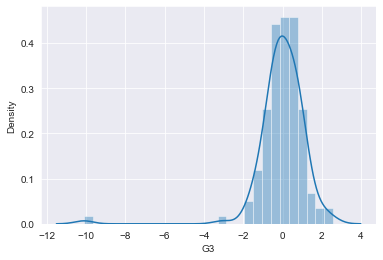

In [62]:
#Distribuzione discrepanza tra i valori predetti e i valori reali
sns.distplot(Por_y_test-y_pred)

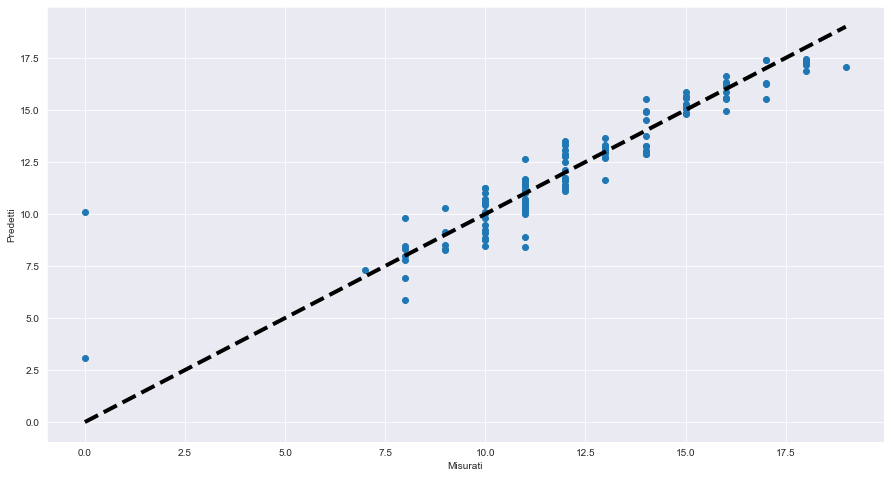

In [63]:
#Visualizzo i valori predetti e quelli del test set
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(Por_y_test, y_pred)
ax.plot([Por_y_test.min(), Por_y_test.max()], [Por_y_test.min(), Por_y_test.max()], 'k--', lw=4)
ax.set_xlabel('Misurati')
ax.set_ylabel('Predetti')
plt.show()

Notiamo come i risultati predetti siano abbastanza precisi rispetto ai dati misurati e si nota una discreta costanza dei valori in relazione all'aumentare della media dei voti, anche se non perfetta in quanto i risultati predetti sembrano essere più corretti per le medie alte a discapito di quelle più basse. Inoltre si notano due outlier nell'asse delle ascisse in corrispondenza dello "0". Alla luce di questo tuttavia non vedo alcun intervento sui dati necessario per risolvere queste problematiche

## ExtraTreeRegression

Utilizziamo ora un modello di ExtraTreeRegression per addestrare i dati con la speranza che possa raggiungere performance superiori ai modelli precedenti. Anche in questo caso useremo la metodologia del GridSearchCV per selezionare i migliori parametri da assegnare al nostro modello più performante

In [64]:
from sklearn.ensemble import ExtraTreesRegressor

kfold = KFold(n_splits=5)

scores = cross_val_score(ExtraTreesRegressor(random_state=42), X_por, y_por, cv=kfold)
print("Cross-validation scores: {}".format(scores))
print("Cross-validation media scores: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.71692535 0.70152426 0.85055682 0.81848562 0.79033269]
Cross-validation media scores: 0.78


In [65]:
params = {'n_estimators': [20,50,100],
          'max_depth': [None, 2,5,],
          'min_samples_split': [2, 0.5, n_samples//2, ],
          'min_samples_leaf': [1, 0.5, n_samples//2, ],
          'criterion': ['mse', 'mae'],
          'max_features': [None, 'sqrt', 'auto', 'log2', 0.3, 0.5, n_features//2],
          'bootstrap':[True, False]
         }

grid_etr = GridSearchCV(ExtraTreesRegressor(random_state=1), param_grid=params, n_jobs=-1, cv=3, verbose=3)

grid_etr.fit(Por_X_train,Por_y_train)
print('Best Parameters : ',grid_etr.best_params_)

Fitting 3 folds for each of 2268 candidates, totalling 6804 fits
Best Parameters :  {'bootstrap': False, 'criterion': 'mse', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [66]:
print('Train R^2 Score : %.3f'%grid_etr.best_estimator_.score(Por_X_train, Por_y_train))
print('Best R^2 Score Through Grid Search : %.3f'%grid_etr.best_score_)

Train R^2 Score : 0.905
Best R^2 Score Through Grid Search : 0.851


In [67]:
cross_val_results = pd.DataFrame(grid_etr.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
                   'param_min_samples_leaf', 'mean_test_score', 
        'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:5] ## Printing first few results.

Number of Various Combinations of Parameters Tried : 2268


,param_max_depth,param_max_features,param_min_samples_split,param_min_samples_leaf,mean_test_score,rank_test_score
1567,5,auto,2,1,0.851079,1
1513,5,None,2,1,0.851079,1
1568,5,auto,2,1,0.850667,3
1514,5,None,2,1,0.850667,3
434,5,auto,2,1,0.848113,5


## Valuto il test set

Addestrato il modello procedo con la valutazione delle performance nel dataset di test

In [68]:
#Seleziono il modello con i parametri migliori
best_etr_model = grid_etr.best_estimator_

#Eseguo il predict ulizzando il dataset di test
y_pred = best_etr_model.predict(Por_X_test)

#Calcolo R2 e MAE
r2_score = best_etr_model.score(Por_X_test,Por_y_test)
MAE=mean_absolute_error(Por_y_test,y_pred)

print("R2: {:.2f}".format(r2_score))
print("Media degli errori assoluta MAE DecisionTreeRegressor: %.2f" % MAE)

R2: 0.86
Media degli errori assoluta MAE DecisionTreeRegressor: 0.71


Le performance del modello nel dataset di test, rispetto ai modelli testati in precendenza, sono risultate superiori e particolarmente brillanti. L' R2 raggiunto è uguale a 0.86, mentre il MAE a 0.71. Il grande numero di parametri utilizzati ha dato un risultato positivo, a discapito però delle prestazioni, ma in un dataset ridotto come il nostro non risulta particolarmente invalidante. Pertanto al momento risulta il nostro modello più efficace

## Gradient Boosting Regressor


Passiamo ora ad un altro modello, il Gradient Boosting Regressor utilizzando il GridSearchCV per la ricerca dei parametri migliori

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

kfold = KFold(n_splits=5)

scores = cross_val_score(GradientBoostingRegressor(random_state=42), X_por, y_por, cv=kfold)
print("Cross-validation scores: {}".format(scores))
print("Cross-validation media scores: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.65215732 0.69247545 0.81309936 0.81650864 0.79479993]
Cross-validation media scores: 0.75


In [70]:
params = {'n_estimators': np.arange(100, 300, 50),
          'max_depth': [None, 3, 5,],
          'min_samples_split': [2, 0.3, 0.5, n_samples//2, ],
          'min_samples_leaf': [1, 0.3, 0.5, n_samples//2, ],
          'criterion': ['friedman_mse', 'mae'],
          'max_features': [None, 'sqrt', 'auto', 'log2', 0.3, 0.7, n_features//2, ],
         }

grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=params, n_jobs=-1, cv=3, verbose=3)

grid_gb.fit(Por_X_train,Por_y_train)
print('Best Parameters : ',grid_gb.best_params_)

Fitting 3 folds for each of 2688 candidates, totalling 8064 fits
Best Parameters :  {'criterion': 'mae', 'max_depth': 3, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 0.3, 'n_estimators': 100}


In [71]:
print('Train R^2 Score : %.3f'%grid_gb.best_estimator_.score(Por_X_train, Por_y_train))
print('Best R^2 Score Through Grid Search : %.3f'%grid_gb.best_score_)

Train R^2 Score : 0.863
Best R^2 Score Through Grid Search : 0.847


In [72]:
cross_val_results = pd.DataFrame(grid_gb.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
                   'param_min_samples_leaf', 'mean_test_score', 
        'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:5] ## Printing first few results.

Number of Various Combinations of Parameters Tried : 2688


,param_max_depth,param_max_features,param_min_samples_split,param_min_samples_leaf,mean_test_score,rank_test_score
2180,3,20,0.3,1,0.846728,1
2572,5,0.7,324,1,0.844224,2
1676,None,0.7,324,1,0.844020,3
2573,5,0.7,324,1,0.843823,4
2125,3,0.7,324,1,0.843773,5


## Valuto il test set

Addestrato il modello procedo con la valutazione delle performance nel dataset di test

In [73]:
#Seleziono il modello con i parametri migliori
best_gb_model = grid_gb.best_estimator_

#Eseguo il predict ulizzando il dataset di test
y_pred = best_gb_model.predict(Por_X_test)

#Calcolo R2 e MAE
r2_score = best_gb_model.score(Por_X_test,Por_y_test)
MAE=mean_absolute_error(Por_y_test,y_pred)

print("R2: {:.2f}".format(r2_score))
print("Media degli errori assoluta MAE DecisionTreeRegressor: %.2f" % MAE)

R2: 0.86
Media degli errori assoluta MAE DecisionTreeRegressor: 0.68


Dati i risultati eccellenti il modello in questione risulta essere il più performante infatti ha rilevato un risultato di R2 uguale a 0.86 e una media degli errori assoluta MAE pari a 0.68. Anche in questo caso il numero di parametri chiamati in causa sono notevoli, ma viste le dimensioni e il tempo di esecuzione comunque accettabile il modello risualta avere ottime performance

## AdaBoostRegressor

Visto lo scopo didattico di questo progetto mi sono divertito a testare vari algoritmi per la risoluzione di questo problema di regressione e mi sembrava opportuno scomodare anche questo modello, l' AdaBoostRegressor. Per la selezione dei parametri migliori ho scelto anche in questo caso il GridSearchCV, date le dimensioni del nostro dataset

In [74]:
from sklearn.ensemble import AdaBoostRegressor

kfold = KFold(n_splits=5)

scores = cross_val_score(AdaBoostRegressor(random_state=42), X_por, y_por, cv=kfold)
print("Cross-validation scores: {}".format(scores))
print("Cross-validation media scores: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.74271393 0.57835636 0.77141674 0.76188959 0.69500153]
Cross-validation media scores: 0.71


In [75]:
params = {
            'base_estimator':[None, RandomForestRegressor(), GradientBoostingRegressor()],
            'n_estimators': np.arange(100, 350, 50),
            'learning_rate': [0.5, 0.8, 1.0, 2.0, ]
         }

grid_abr = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid=params, n_jobs=-1, cv=3, verbose=3)
grid_abr.fit(Por_X_train,Por_y_train)
print('Best Parameters : ',grid_abr.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best Parameters :  {'base_estimator': RandomForestRegressor(), 'learning_rate': 1.0, 'n_estimators': 100}


In [76]:
print('Train R^2 Score : %.3f'%grid_abr.best_estimator_.score(Por_X_train, Por_y_train))
print('Best R^2 Score Through Grid Search : %.3f'%grid_abr.best_score_)

Train R^2 Score : 0.992
Best R^2 Score Through Grid Search : 0.853


In [77]:
cross_val_results = pd.DataFrame(grid_abr.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results[['param_base_estimator', 'param_n_estimators', 'param_learning_rate', 'mean_test_score', 
        'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:5] ## Printing first few results.

Number of Various Combinations of Parameters Tried : 60


,param_base_estimator,param_n_estimators,param_learning_rate,mean_test_score,rank_test_score
30,RandomForestRegressor(),100,1.0,0.852522,1
31,RandomForestRegressor(),150,1.0,0.852374,2
34,RandomForestRegressor(),300,1.0,0.852290,3
32,RandomForestRegressor(),200,1.0,0.852007,4
33,RandomForestRegressor(),250,1.0,0.851960,5


## Valuto il test set

Addestrato il modello procedo con la valutazione delle performance nel dataset di test

In [78]:
#Seleziono il modello con i parametri migliori
best_abr_model = grid_abr.best_estimator_

#Eseguo il predict ulizzando il dataset di test
y_pred = best_abr_model.predict(Por_X_test)

#Calcolo R2 e MAE
r2_score = best_abr_model.score(Por_X_test,Por_y_test)
MAE=mean_absolute_error(Por_y_test,y_pred)

print("R2: {:.2f}".format(r2_score))
print("Media degli errori assoluta MAE DecisionTreeRegressor: %.2f" % MAE)

R2: 0.85
Media degli errori assoluta MAE DecisionTreeRegressor: 0.75


Anche in questo caso i risultati sono eccellenti, anche se leggermente inferiori ad alcuni modelli testati in precedenza. L'R2 è a 0.85%, mentre la MAE a 0.75

## Linear regression

Utilizziamo ora un modello di LinearRegression per addestrare i dati con la speranza che possa raggiungere performance superiori ai modelli precedenti. Il modello utilizza il dataset completo, senza una standardizzazione dei dati.

In [79]:
from sklearn.linear_model import LinearRegression

kfold = KFold(n_splits=5)

scores = cross_val_score(LinearRegression(), X_por, y_por, cv=kfold)
print("Cross-validation scores: {}".format(scores))
print("Cross-validation media scores: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.75327197 0.7397694  0.82061432 0.8549464  0.80095376]
Cross-validation media scores: 0.79


In [80]:
from sklearn.metrics import mean_absolute_error, r2_score

#Addestro il modello
reg = LinearRegression().fit(Por_X_train,Por_y_train)

#Eseguo la predict utilizzando il dataset di test
prediction=reg.predict(Por_X_test)

#Stampo R2 e MAE
print("R2 Square {:.2f}".format(r2_score(Por_y_test,prediction)))
print("Errore medio assoluto MAE: {:.2f}".format(mean_absolute_error(Por_y_test,prediction)))

R2 Square 0.85
Errore medio assoluto MAE: 0.77


Le performance del modello nel dataset di test sono elevate e risultano promettenti se ad esso applichiamo una "regolarizzazione". L' R2 raggiunto è uguale a 0.85%, mentre il MAE a 0.77. Proviamo ora a "regolarizzare" il modello attraverso l'L1

## L1

In [81]:
from sklearn.linear_model import Lasso

params = {'alpha' : [500, 200, 100, 50,10, 1, 0.1, 0.01],
         'fit_intercept': [True, False],
          }

grid_L1 = GridSearchCV(Lasso(random_state=42), param_grid=params, cv=3, n_jobs=-1, verbose=3)
grid_L1.fit(Por_X_train, Por_y_train)
print('Best Parameters : ',grid_L1.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters :  {'alpha': 0.1, 'fit_intercept': False}


In [82]:
print('Train R^2 Score : %.3f'%grid_L1.best_estimator_.score(Por_X_train, Por_y_train))
print('Best R^2 Score Through Grid Search : %.3f'%grid_L1.best_score_)

Train R^2 Score : 0.845
Best R^2 Score Through Grid Search : 0.846


In [83]:
cross_val_results = pd.DataFrame(grid_L1.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results.iloc[:5] ## Printing first few results.

Number of Various Combinations of Parameters Tried : 16


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009338,0.006603,0.126065,0.000000,500,True,"{'alpha': 500, 'fit_intercept': True}",-0.000011,-0.016047,-0.028032,-0.014697,0.011479,8
1,0.000000,0.000000,0.126065,0.000000,500,False,"{'alpha': 500, 'fit_intercept': False}",-11.224166,-11.148554,-20.425568,-14.266096,4.355514,15
2,0.000000,0.000000,0.084043,0.059427,200,True,"{'alpha': 200, 'fit_intercept': True}",-0.000011,-0.016047,-0.028032,-0.014697,0.011479,8
3,0.005206,0.007363,0.000000,0.000000,200,False,"{'alpha': 200, 'fit_intercept': False}",-11.224166,-11.148554,-20.425568,-14.266096,4.355514,15
4,0.000000,0.000000,0.000000,0.000000,100,True,"{'alpha': 100, 'fit_intercept': True}",-0.000011,-0.016047,-0.028032,-0.014697,0.011479,8


## Valuto il test set

Addestrato il modello procedo con la valutazione delle performance nel dataset di test

In [84]:
#Seleziono il modello con i parametri migliori
best_L1_model = grid_L1.best_estimator_

#Eseguo il predict ulizzando il dataset di test
y_pred = best_L1_model.predict(Por_X_test)

#Calcolo R2 e MAE
r2_score = best_L1_model.score(Por_X_test,Por_y_test)
MAE=mean_absolute_error(Por_y_test,y_pred)

print("R2: {:.2f}".format(r2_score))
print("Media degli errori assoluta MAE DecisionTreeRegressor: %.2f" % MAE)

R2: 0.86
Media degli errori assoluta MAE DecisionTreeRegressor: 0.72


A seguito di una "regolarizzazione" abbiamo leggermente migliorato le performance mantenendo contenuti i tempi di esecuzione. Il risultato R2 è 0.86%, mentre la media degli errori assoluta è 0.72. Proviamo ora con la "regolarizzazione" L2

## L2

In [85]:
from sklearn.linear_model import Ridge ## Linear Regression Implementation


from sklearn.model_selection import GridSearchCV

params = {'alpha' : [500, 200, 100, 50,10, 1, 0.1, 0.01],
         'fit_intercept': [True, False],
         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

grid_L2 = GridSearchCV(Ridge(random_state=42), param_grid=params, cv=3, n_jobs=-1, verbose=3)
grid_L2.fit(Por_X_train, Por_y_train)
print('Best Parameters : ',grid_L2.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Parameters :  {'alpha': 100, 'fit_intercept': False, 'solver': 'sparse_cg'}


In [86]:
print('Train R^2 Score : %.3f'%grid_L2.best_estimator_.score(Por_X_train, Por_y_train))
print('Best R^2 Score Through Grid Search : %.3f'%grid_L2.best_score_)

Train R^2 Score : 0.849
Best R^2 Score Through Grid Search : 0.842


In [87]:
cross_val_results = pd.DataFrame(grid_L2.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results.iloc[:5] ## Printing first few results.

Number of Various Combinations of Parameters Tried : 96


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033762,0.000000,0.000000,0.000000,500,True,svd,"{'alpha': 500, 'fit_intercept': True, 'solver'...",0.797583,0.813965,0.889998,0.833849,0.040263,50
1,0.032085,0.001186,0.001677,0.001186,500,True,cholesky,"{'alpha': 500, 'fit_intercept': True, 'solver'...",0.797583,0.813965,0.889998,0.833849,0.040263,49
2,0.000000,0.000000,0.000000,0.000000,500,True,lsqr,"{'alpha': 500, 'fit_intercept': True, 'solver'...",0.797685,0.813992,0.889966,0.833881,0.040213,48
3,0.005207,0.007364,0.005207,0.007364,500,True,sparse_cg,"{'alpha': 500, 'fit_intercept': True, 'solver'...",0.797685,0.813992,0.889966,0.833881,0.040213,47
4,0.013515,0.000000,0.000000,0.000000,500,True,sag,"{'alpha': 500, 'fit_intercept': True, 'solver'...",0.797565,0.813951,0.889991,0.833836,0.040267,51


## Valuto il test set

Addestrato il modello procedo con la valutazione delle performance nel dataset di test

In [88]:
#Seleziono il modello con i parametri migliori
best_L2_model = grid_L2.best_estimator_

#Eseguo il predict ulizzando il dataset di test
y_pred = best_L2_model.predict(Por_X_test)

#Calcolo R2 e MAE
r2_score = best_L2_model.score(Por_X_test,Por_y_test)
MAE=mean_absolute_error(Por_y_test,y_pred)

print("R2: {:.2f}".format(r2_score))
print("Media degli errori assoluta MAE DecisionTreeRegressor: %.2f" % MAE)

R2: 0.86
Media degli errori assoluta MAE DecisionTreeRegressor: 0.73


Anche in questo caso rispetto al modello di regressione lineare standard abbiamo un leggero miglioramento delle performance, che però risultato simili al modello precedente: R2 a 0.86% e MAE a 0.73

## Scalatura dei dati per i modelli KneighborsRegressor e SVR

Per i modelli KneighborsRegressor e SVR occorre effettuare una scalatura dei dati in quanto essi non performano bene con valori che non sono tutti nella stessa scala di valutazione. La metodologia adottata utilizza il MinMaxScaler.

In [89]:
from sklearn.preprocessing import MinMaxScaler

#Utilizzo MinMaxScaler per effettuare la scalatura dei dati
scal = MinMaxScaler()

#Nuovo dataset
Por_X_train_scal = scal.fit_transform(Por_X_train)
Por_X_test_scal = scal.transform(Por_X_test)

## KNeighborsRegressor

Andiamo ora a testare il KNeighborsRegressor. Anche in questo caso utilizzaremo il GridSearchCV

In [90]:
from sklearn.neighbors import KNeighborsRegressor

kfold = KFold(n_splits=5)

scores = cross_val_score(KNeighborsRegressor(), X_por, y_por, cv=kfold)
print("Cross-validation scores: {}".format(scores))
print("Cross-validation media scores: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.62186411 0.63965052 0.79178628 0.80261641 0.66850023]
Cross-validation media scores: 0.70


In [91]:
param_grid = {'leaf_size' : [np.arange(1,50).tolist()],
              'n_neighbors' : [3,5,10, n_samples//2, n_samples//3, n_samples//5 ],
              'weights': ['uniform','distance']}

grid_knr = GridSearchCV(KNeighborsRegressor(), cv=3, n_jobs=-1, verbose=3, param_grid = param_grid)

grid_knr.fit(Por_X_train_scal, Por_y_train)
print('Best Parameters : ',grid_knr.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters :  {'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'n_neighbors': 10, 'weights': 'distance'}


In [92]:
print('Train R^2 Score : %.3f'%grid_knr.best_estimator_.score(Por_X_train_scal, Por_y_train))
print('Best R^2 Score Through Grid Search : %.3f'%grid_knr.best_score_)

Train R^2 Score : 1.000
Best R^2 Score Through Grid Search : 0.240


In [93]:
cross_val_results = pd.DataFrame(grid_knr.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results[['param_n_neighbors', 'param_weights','mean_test_score', 
        'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:5] ## Printing first few results.

Number of Various Combinations of Parameters Tried : 12


,param_n_neighbors,param_weights,mean_test_score,rank_test_score
5,10,distance,0.240244,1
3,5,distance,0.234916,2
4,10,uniform,0.226370,3
2,5,uniform,0.222514,4
11,129,distance,0.168119,5


## Valuto il test set

Addestrato il modello procedo con la valutazione delle performance nel dataset di test

In [94]:
#Seleziono il modello con i parametri migliori
best_knr_model = grid_knr.best_estimator_

#Eseguo il predict ulizzando il dataset di test
y_pred = best_knr_model.predict(Por_X_test_scal)

#Calcolo R2 e MAE
r2_score = best_knr_model.score(Por_X_test_scal,Por_y_test)
MAE=mean_absolute_error(Por_y_test,y_pred)

print("R2: {:.2f}".format(r2_score))
print("Media degli errori assoluta MAE DecisionTreeRegressor: %.2f" % MAE)

R2: 0.23
Media degli errori assoluta MAE DecisionTreeRegressor: 2.06


Il modello non risulta particolarmente efficiente con il nostro dataset, intatti abbiamo dei risultati scadenti che toccano i valori di R2 uguale a 0.23% e una MAE a 2.06

## SVR

Andiamo ora ad utilizzare un'algoritmo particolamente complesso che richiederà una attenta selezione dei parametri. I tempi di esecuzione utilizzando grandi range di valori sarà particolarmente impegnativa, anche se dalla nostra abbiamo un dataset poco ricco di dati e potrebbe promettere bene. In questo caso per la scelta degli iperparametri adotteremo una metodologia simile al GridSearchCV, che prende il nome di RandomizedSearchCV. Questo algoritmo è molto utile quando abbiamo tanti parametri da provare e il tempo di addestramento è molto lungo, infatti invece di testare tutte le combinazioni ne seleziona in modo randomico un numero da noi impostato

In [95]:
from sklearn.svm import SVR

kfold = KFold(n_splits=5)

scores = cross_val_score(SVR(), X_por, y_por, cv=kfold)
print("Cross-validation scores: {}".format(scores))
print("Cross-validation media scores: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.78850739 0.708818   0.85547757 0.86808288 0.70865648]
Cross-validation media scores: 0.79


In [96]:
from sklearn.model_selection import RandomizedSearchCV

params = {'gamma': np.power(10, np.linspace(-5, 5, 10).tolist()).tolist(),
          'C':np.power(10, np.linspace(-5, 5, 8).tolist()).tolist(),
          'epsilon' : np.power(10, np.linspace(-5, 5, 10).tolist()).tolist()}


#Utilizzo C perché regola il grado di complessità della superficie separatrice (parametro regolarizzatore), gamma 
#perché influisce su quale sia il peso degli esempi ed epsilon perché rappresenta il margine in cui dati possono
#stare senza essere nominati errori.
#2000 possili combinazioni, ma ne genero 400.

grid_svr = RandomizedSearchCV(SVR(cache_size=1000), param_distributions = params, cv = 5, n_jobs = -1, verbose=3,
                            n_iter = 400, random_state=42,)
#addestro il modello
grid_svr.fit(Por_X_train_scal, Por_y_train)
print('Best Parameters : ',grid_svr.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best Parameters :  {'gamma': 0.0001291549665014884, 'epsilon': 0.2782559402207126, 'C': 100000.0}


In [97]:
print('Train R^2 Score : %.3f'%grid_svr.best_estimator_.score(Por_X_train_scal, Por_y_train))
print('Best R^2 Score Through Grid Search : %.3f'%grid_svr.best_score_)

Train R^2 Score : 0.855
Best R^2 Score Through Grid Search : 0.840


In [98]:
cross_val_results = pd.DataFrame(grid_svr.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results[['param_gamma', 'mean_test_score','param_C', 'param_epsilon', 'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:5] ## Printing first few results.

Number of Various Combinations of Parameters Tried : 400


,param_gamma,mean_test_score,param_C,param_epsilon,rank_test_score
39,0.000129,0.839598,100000.0,0.278256,1
22,0.001668,0.832918,3727.59372,0.001668,2
376,0.001668,0.832909,3727.59372,0.00001,3
23,0.000129,0.832335,100000.0,0.001668,4
220,0.00001,0.826996,100000.0,0.021544,5


## Valuto il test set

Addestrato il modello procedo con la valutazione delle performance nel dataset di test

In [99]:
#Seleziono il modello con i parametri migliori
best_svr_model = grid_svr.best_estimator_

#Eseguo il predict ulizzando il dataset di test
y_pred = best_svr_model.predict(Por_X_test_scal)

#Calcolo R2 e MAE
r2_score = best_svr_model.score(Por_X_test_scal,Por_y_test)
MAE=mean_absolute_error(Por_y_test,y_pred)

print("R2: {:.2f}".format(r2_score))
print("Media degli errori assoluta MAE SVR: %.2f" % MAE)

R2: 0.87
Media degli errori assoluta MAE SVR: 0.69


Il modello risulta particolarmente efficiente con il nostro dataset, infatti grazie alla dimenzione del dataset siamo in grado di spaziare provando diverse combinazioni di paramentri. Anche i risultati risultato efficaci ed hanno dei valori di R2 uguale a 0.87 e una MAE a 0.69

## Considerazioni risultati:

**DecisionTreeRegression**:
* R2: 0.80
* Media degli errori assoluta MAE DecisionTreeRegressor: 0.79

**RandomForestRegressor**:
* R2: 0.84
* Media degli errori assoluta MAE RandomForestRegressor: 0.74

**ExtraTreeRegression**:
* R2: 0.86
* Media degli errori assoluta MAE ExtraTreeRegression: 0.71

**GradientBoostingRegressor**:
* R2: 0.86
* Media degli errori assoluta MAE GradientBoostingRegressor: 0.68

**AdaBoostRegressor**:
* R2: 0.85
* Media degli errori assoluta MAE AdaBoostRegressor: 0.75

**LinearRegression**:
* R2: 0.85
* Media degli errori assoluta MAE LinearRegression: 0.77

**L1**:
* R2: 0.86
* Media degli errori assoluta MAE L1: 0.72

**L2**:
* R2: 0.86
* Media degli errori assoluta MAE L2: 0.73

**KneighborsRegressor**:
* R2: 0.23
* Media degli errori assoluta MAE KNeighborsRegressor: 2.06

**SVR**:
* R2: 0.87
* Media degli errori assoluta MAE SVR: 0.69

Avendo eseguito un gran numero di modelli tra i più famosi per la risoluzione di problemi di regressione, siamo in grado ora di selezionare quelli più performanti in base ai risultati e al tempo di esecuzione. Constatiamo come il modello più performante, utilizzando la metrica di valutazione più utilizzata per i problemi di regressione, l'R quadro e la media degli errori assoluta MAE, è il Gradient Boosting Regressor con un R2 di 0.86% e una MAE di 0.68, anche se l'algoritmo SVR risulta perfomante alla stessa maniera, ma molto più efficiente

Andiamo ora a visualizzare quali sono le feature che hanno inciso maggiormente nella predizione del voto finale utilizzando il GradientBoosting

# Visualizzazione features importanti
Visualizziamo l'importanza delle features per il modello GradientBoostingRegressor

In [100]:
#eseguo ancora una volta il fit per mostrare le feature più significative
best_gb_model = grid_gb.best_estimator_
best_gb_model.fit(Por_X_train, Por_y_train)

GradientBoostingRegressor(criterion='mae', max_features=20,
                          min_samples_split=0.3, random_state=42)

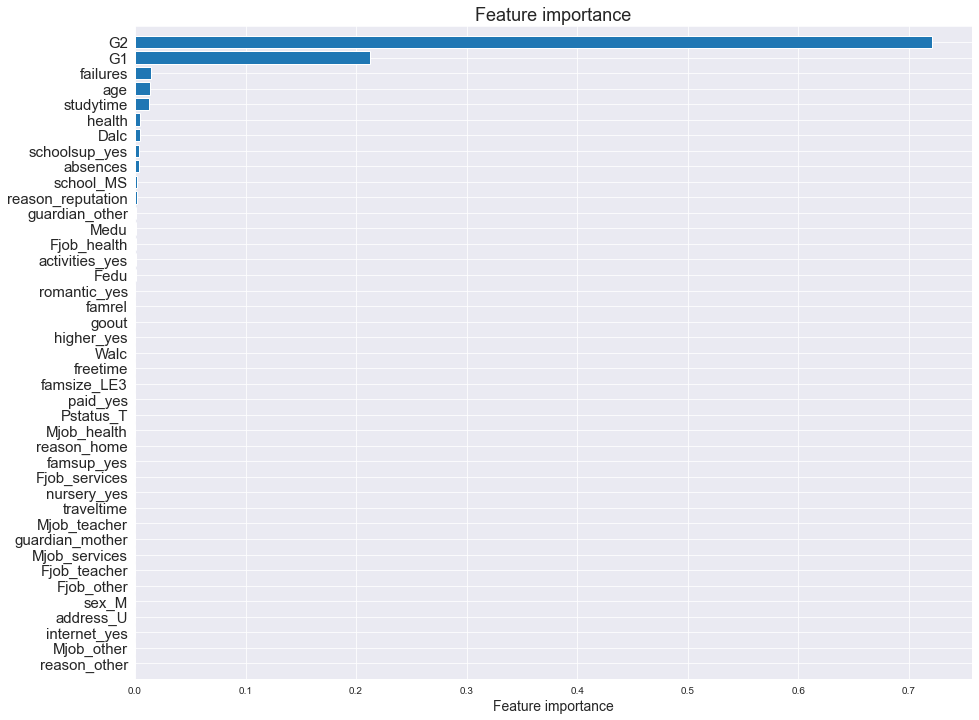

In [101]:
#features più importanti
plt.figure(figsize=(15, 12))
sorted_idx = best_gb_model.feature_importances_.argsort()    
plt.barh(Por_X_test.columns[sorted_idx], best_gb_model.feature_importances_[sorted_idx], align='center')
plt.yticks(Por_X_test.columns[sorted_idx], size=15)
plt.xlabel("Feature importance", size=14)
plt.title("Feature importance", size=18)
plt.ylim(-1, n_features)
plt.show()

In [102]:
for i in(sorted_idx):  # Stampo il valore delle features
    print('Feature: {}, Score: {:.5f}' .format(Por_X_test.columns[i],  best_gb_model.feature_importances_[i]))

Feature: reason_other, Score: 0.00000
Feature: Mjob_other, Score: 0.00000
Feature: internet_yes, Score: 0.00000
Feature: address_U, Score: 0.00000
Feature: sex_M, Score: 0.00000
Feature: Fjob_other, Score: 0.00000
Feature: Fjob_teacher, Score: 0.00000
Feature: Mjob_services, Score: 0.00000
Feature: guardian_mother, Score: 0.00000
Feature: Mjob_teacher, Score: 0.00000
Feature: traveltime, Score: 0.00000
Feature: nursery_yes, Score: 0.00000
Feature: Fjob_services, Score: 0.00008
Feature: famsup_yes, Score: 0.00009
Feature: reason_home, Score: 0.00011
Feature: Mjob_health, Score: 0.00011
Feature: Pstatus_T, Score: 0.00012
Feature: paid_yes, Score: 0.00018
Feature: famsize_LE3, Score: 0.00019
Feature: freetime, Score: 0.00019
Feature: Walc, Score: 0.00022
Feature: higher_yes, Score: 0.00026
Feature: goout, Score: 0.00029
Feature: famrel, Score: 0.00035
Feature: romantic_yes, Score: 0.00049
Feature: Fedu, Score: 0.00056
Feature: activities_yes, Score: 0.00064
Feature: Fjob_health, Score: 0.

# Scelta features da rimuovere

Elenchiamo le features che non hanno alcuna influenza nel nostro modello (0.00%):

- reason_other, Score: 0.00000
- Mjob_other, Score: 0.00000
- internet_yes, Score: 0.00000
- address_U, Score: 0.00000
- sex_M, Score: 0.00000
- Fjob_other, Score: 0.00000
- Fjob_teacher, Score: 0.00000
- Mjob_services, Score: 0.00000
- guardian_mother, Score: 0.00000
- Mjob_teacher, Score: 0.00000
- traveltime, Score: 0.00000
- nursery_yes, Score: 0.00000

mentre quelle che risultano più influenti sono (>0.0004%):

- romantic_yes, Score: 0.00049
- FFedu, Score: 0.00056
- activities_yes, Score: 0.00064
- Fjob_health, Score: 0.00075
- Medu, Score: 0.00087
- guardian_other, Score: 0.00124
- reason_reputation, Score: 0.00151
- school_MS, Score: 0.00164
- absences, Score: 0.00380
- schoolsup_yes, Score: 0.00390
- Dalc, Score: 0.00419
- health, Score: 0.00451
- studytime, Score: 0.01263
- age, Score: 0.01316
- failures, Score: 0.01459
- G1, Score: 0.21248
- G2, Score: 0.72085

Tuttavia siccome lo scopo nostro è quello di capire quali sono i fattori sociali e personali che incidono maggiormente nella carriera scolastica di uno studente, ci limitiamo ad escludere solamente le due feature che risultano più predominanti, pertanto rimuoveremo dal dataset le fatures "G1" e "G2"

## Rimozione features G1 e G2 dal dataset

In [103]:
Por_X_train = Por_X_train.drop(columns = ['G1', 'G2'])
Por_y_train = Por_y_train.drop(columns = ['G1', 'G2'])
Por_X_test = Por_X_test.drop(columns = ['G1', 'G2'])
Por_y_test = Por_y_test.drop(columns = ['G1', 'G2'])

## Riaddestramento

## Gradient Boosting Regressor

Eseguiamo ancora il GradientBoostingRegressor con il dataset filtrato

In [104]:
kfold = KFold(n_splits=5)

scores = cross_val_score(GradientBoostingRegressor(random_state=42), X_por, y_por, cv=kfold)
print("Cross-validation scores: {}".format(scores))
print("Cross-validation media scores: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.65215732 0.69247545 0.81309936 0.81650864 0.79479993]
Cross-validation media scores: 0.75


In [105]:
n_features = Por_X_train.shape[1]
n_samples = Por_X_train.shape[0]

params = {'n_estimators': np.arange(100, 300, 50),
          'max_depth': [None, 3, 5,],
          'min_samples_split': [2, 0.3, 0.5, n_samples//2, ],
          'min_samples_leaf': [1, 0.3, 0.5, n_samples//2, ],
          'criterion': ['friedman_mse', 'mae'],
          'max_features': [None, 'sqrt', 'auto', 'log2', 0.3, 0.7, n_features//2, ],
         }

grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=params, n_jobs=-1, cv=3, verbose=3)

grid_gb.fit(Por_X_train,Por_y_train)
print('Best Parameters : ',grid_gb.best_params_)

Fitting 3 folds for each of 2688 candidates, totalling 8064 fits
Best Parameters :  {'criterion': 'mae', 'max_depth': None, 'max_features': 0.3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [106]:
print('Train R^2 Score : %.3f'%grid_gb.best_estimator_.score(Por_X_train, Por_y_train))
print('Best R^2 Score Through Grid Search : %.3f'%grid_gb.best_score_)

Train R^2 Score : 1.000
Best R^2 Score Through Grid Search : 0.311


In [107]:
cross_val_results = pd.DataFrame(grid_gb.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
                   'param_min_samples_leaf', 'mean_test_score', 
        'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:5] ## Printing first few results.

Number of Various Combinations of Parameters Tried : 2688


,param_max_depth,param_max_features,param_min_samples_split,param_min_samples_leaf,mean_test_score,rank_test_score
1602,None,0.3,2,1,0.311324,1
1603,None,0.3,2,1,0.311324,2
1601,None,0.3,2,1,0.311324,3
1600,None,0.3,2,1,0.311324,4
1411,None,sqrt,2,1,0.308057,5


## Valuto il test set

Addestrato il modello procedo con la valutazione delle performance nel dataset di test

In [108]:
#Seleziono il modello con i parametri migliori
best_gb_model = grid_gb.best_estimator_

#Eseguo il predict ulizzando il dataset di test
y_pred = best_gb_model.predict(Por_X_test)

#Calcolo R2 e MAE
r2_score = best_gb_model.score(Por_X_test,Por_y_test)
MAE=mean_absolute_error(Por_y_test,y_pred)

print("R2: {:.2f}".format(r2_score))
print("Media degli errori assoluta MAE DecisionTreeRegressor: %.2f" % MAE)

R2: 0.22
Media degli errori assoluta MAE DecisionTreeRegressor: 2.03


Come prevedibile rimuovendo le feature più significative le performance sono calate drasticamente (R2: 0.22 e MAE: 2.03). Con un dataset così composto non è possibile addestrare un modello particolarmente efficace, ma possiamo vedere quali sono le feature che hanno inciso maggiormente


# Visualizzazione features importanti dataset filtrato
Visualizziamo l'importanza delle features per il modello GradientBoostingRegressor con il dataset filtrato

In [109]:
#eseguo ancora una volta il fit per mostrare le feature più significative
best_gb_model = grid_gb.best_estimator_
best_gb_model.fit(Por_X_train, Por_y_train)

GradientBoostingRegressor(criterion='mae', max_depth=None, max_features=0.3,
                          n_estimators=200, random_state=42)

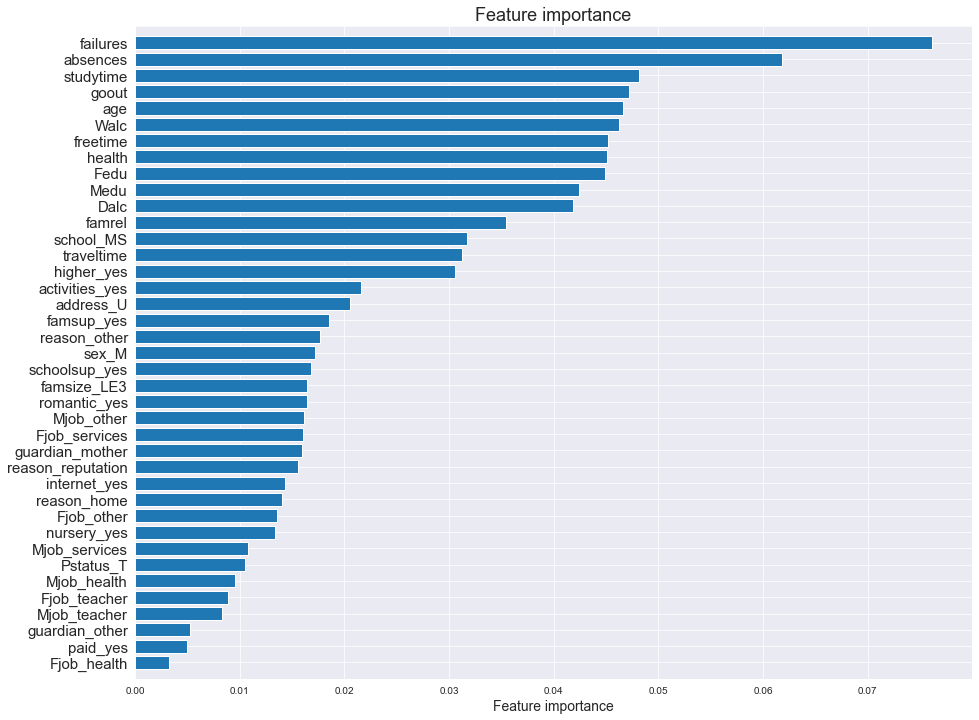

In [110]:
#features più importanti
plt.figure(figsize=(15, 12))
sorted_idx = best_gb_model.feature_importances_.argsort()  
plt.barh(Por_X_test.columns[sorted_idx], best_gb_model.feature_importances_[sorted_idx], align='center')
plt.yticks(Por_X_test.columns[sorted_idx], size=15)
plt.xlabel("Feature importance", size=14)
plt.title("Feature importance", size=18)
plt.ylim(-1, n_features)
plt.show()

In [111]:
for i in(sorted_idx):  # Stampo il valore delle features
    print('Feature: {}, Score: {:.5f}' .format(Por_X_test.columns[i],  best_gb_model.feature_importances_[i]))

Feature: Fjob_health, Score: 0.00323
Feature: paid_yes, Score: 0.00500
Feature: guardian_other, Score: 0.00529
Feature: Mjob_teacher, Score: 0.00827
Feature: Fjob_teacher, Score: 0.00884
Feature: Mjob_health, Score: 0.00951
Feature: Pstatus_T, Score: 0.01052
Feature: Mjob_services, Score: 0.01075
Feature: nursery_yes, Score: 0.01337
Feature: Fjob_other, Score: 0.01355
Feature: reason_home, Score: 0.01406
Feature: internet_yes, Score: 0.01432
Feature: reason_reputation, Score: 0.01553
Feature: guardian_mother, Score: 0.01591
Feature: Fjob_services, Score: 0.01604
Feature: Mjob_other, Score: 0.01611
Feature: romantic_yes, Score: 0.01642
Feature: famsize_LE3, Score: 0.01646
Feature: schoolsup_yes, Score: 0.01685
Feature: sex_M, Score: 0.01717
Feature: reason_other, Score: 0.01769
Feature: famsup_yes, Score: 0.01853
Feature: address_U, Score: 0.02052
Feature: activities_yes, Score: 0.02164
Feature: higher_yes, Score: 0.03056
Feature: traveltime, Score: 0.03122
Feature: school_MS, Score: 0.

### Considerazioni feature importance

Dalla visualizzazione delle features più importanti selezionando quelle che superano il valore di 0.04 sono:

- Dalc, Score: 0.04180
- Medu, Score: 0.04237
- Fedu, Score: 0.04486
- health, Score: 0.04513
- freetime, Score: 0.04516
- Walc, Score: 0.04628
- age, Score: 0.04660
- goout, Score: 0.04722
- studytime, Score: 0.04818
- absences, Score: 0.06175
- failures, Score: 0.07613

Tali feature erano state evidenziate come determinanti anche in fase di analisi EDA